## Time series forecasting fundamentals with tensorflow

## Get data

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


## importing time series with pandas

In [1]:
import pandas as pd
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [2]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
# How many sample
len(df)

2787

In [5]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


Text(0.5, 1.0, 'Price of Bitcoin')

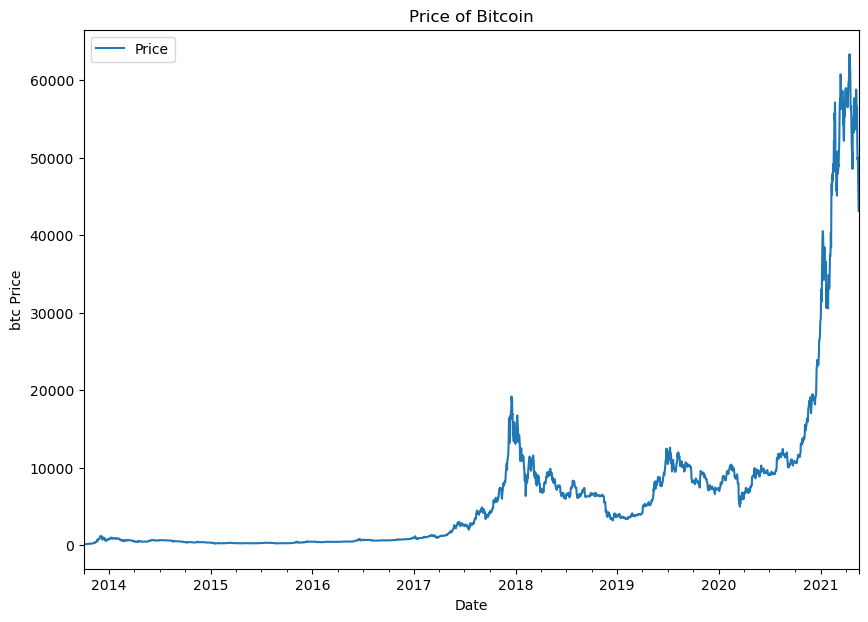

In [6]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("btc Price")
plt.title("Price of Bitcoin")

## Importing time series data with python's csv module

In [7]:
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv") as f:
  csv_reader = csv.reader(f, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
      timesteps.append(datetime.strptime(row[1], "%Y-%m-%d"))
      btc_price.append(float(row[2]))

timesteps[:10], btc_price[:10]


([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

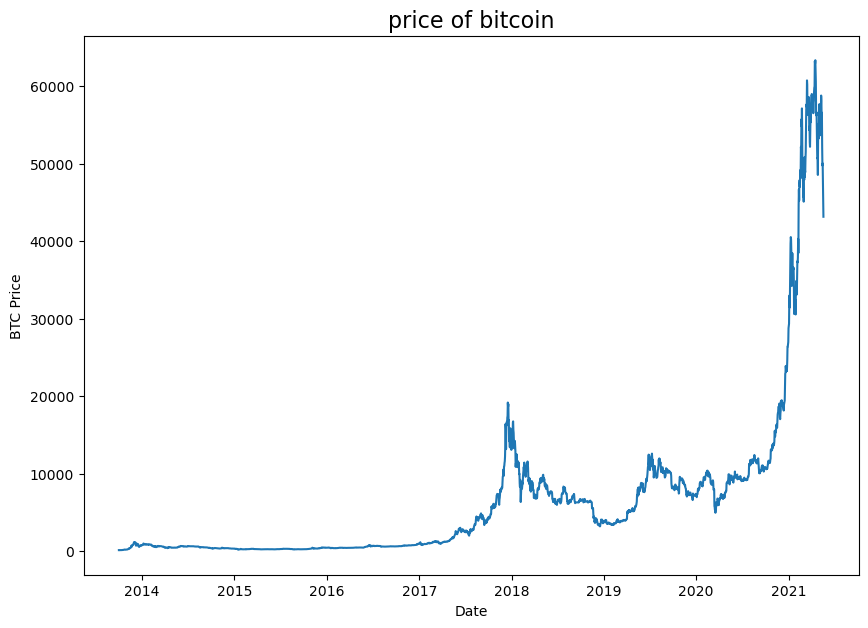

In [8]:
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("price of bitcoin", fontsize=16)
plt.xlabel("Date")

## Format data part 1: Create train and test sets

### the wrong way

In [9]:
from sklearn.model_selection import train_test_split
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

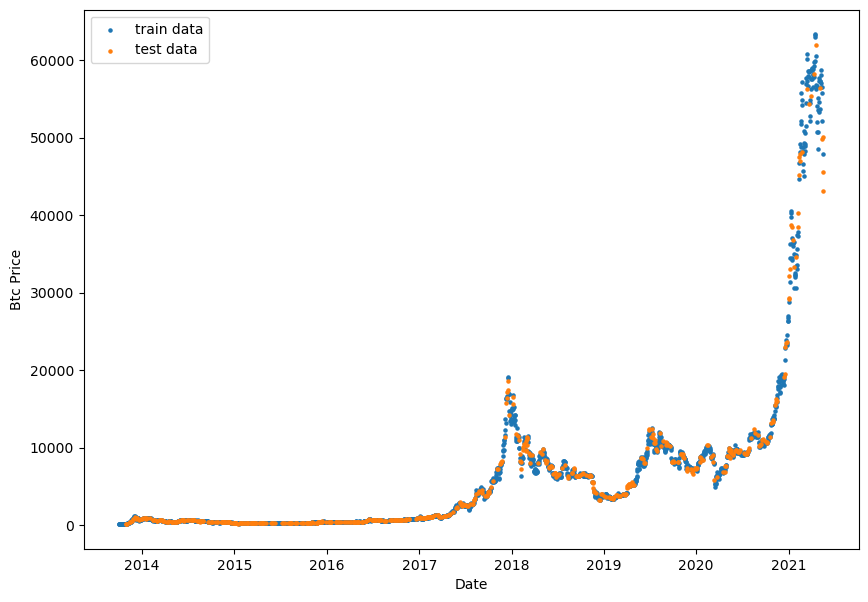

In [11]:
# plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="train data")
plt.scatter(X_test, y_test, s=5, label="test data")
plt.xlabel("Date")
plt.ylabel("Btc Price")
plt.legend()

### the right way

In [12]:
split_size = int(0.8 * len(prices))
X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]
len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

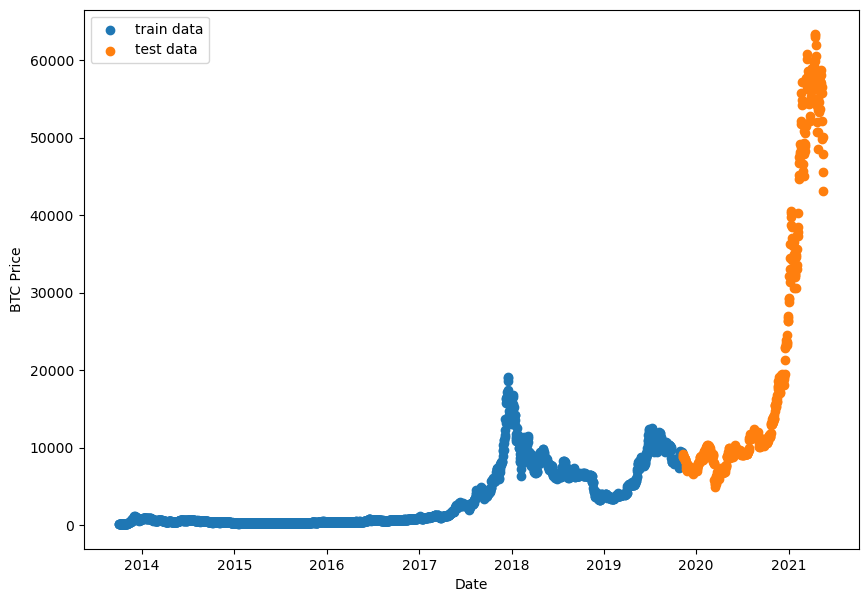

In [13]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, label="train data")
plt.scatter(X_test, y_test, label="test data")
plt.ylabel("BTC Price")
plt.xlabel("Date")
plt.legend()

## Create a plotting function


In [14]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)


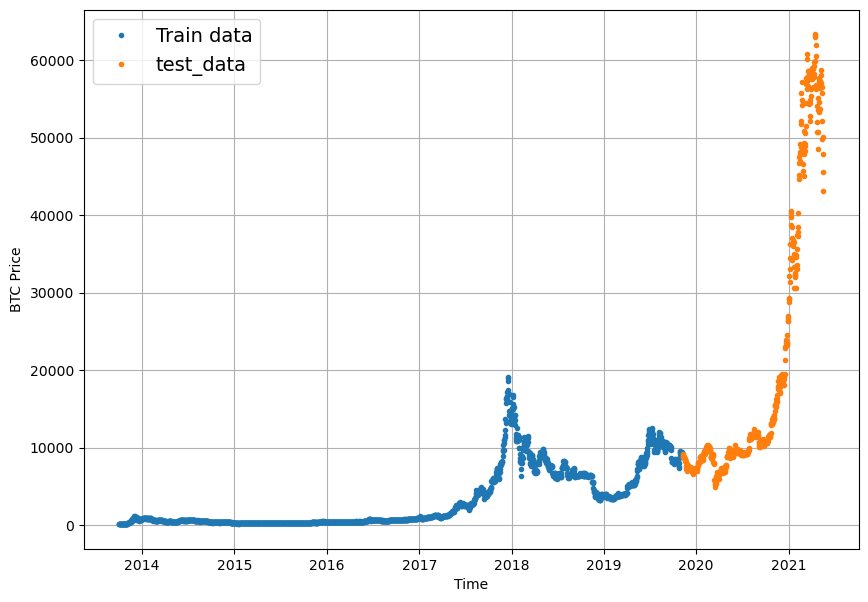

In [15]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="test_data")

## Modelling Experiments

## Model 0: Naive forecast (baseline)

In [16]:
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

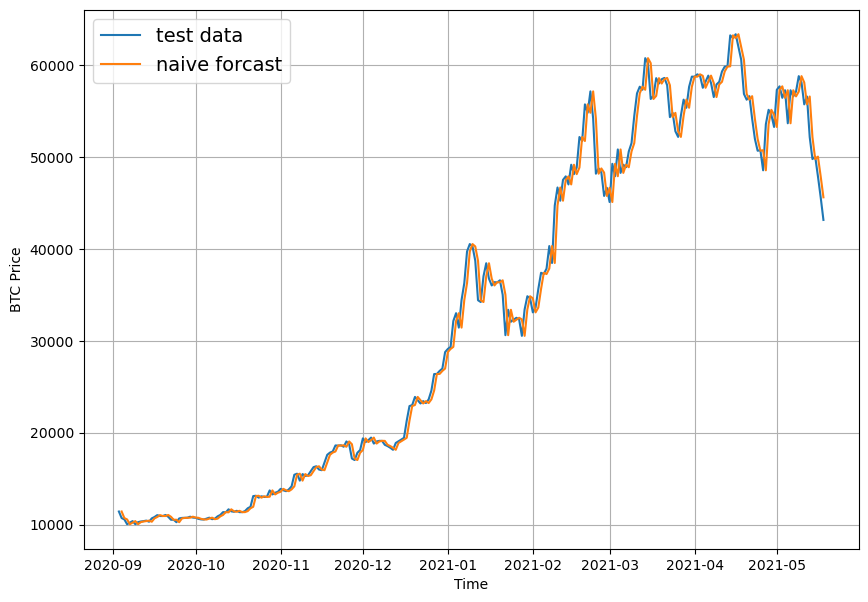

In [17]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, label="train data")
plot_time_series(timesteps=X_test, values=y_test, start=300, format='-', label="test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast,start=300, format='-', label="naive forcast")

## Evaluating a time series model
* MAE
* MSE
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error


In [18]:
import tensorflow as tf

C:\Users\my pc\.conda\envs\p3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [19]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae/mae_naive_no_season

In [20]:
mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy()

0.9995699939182626

In [21]:
def evaluation_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)
  metrics = {}
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred).numpy()
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred).numpy()
  mase = mean_absolute_scaled_error(y_true, y_pred).numpy()
  rmse = tf.sqrt(mse).numpy()
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred).numpy()

  metrics["mae"] = mae
  metrics["mse"] = mse
  metrics["mase"] = mase
  metrics["rmse"] = rmse
  metrics["mape"] = mape

  return metrics

In [22]:
naive_results = evaluation_preds(y_test[1:], naive_forecast)

## Format data part2: Windowing our dataset

In [23]:
HORIZON = 1
WINDOW_SIZE = 7


In [24]:
# Create a function to label windowed data
def get_labelled_window(x, horizon=HORIZON):
  return x[:, :-horizon], x[:, -horizon:]

In [25]:
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1, axis=0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]])>)

In [26]:
btc_windowed = []
for i in range(len(btc_price)):
  btc_windowed.append([btc_price[i:WINDOW_SIZE+i], btc_price[i+WINDOW_SIZE:i+WINDOW_SIZE+HORIZON]])

In [27]:
import numpy as np
# Create a function to view numpy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size+horizon-1)), axis=0).T
  # print(f'window idexes:\n{window_indexes, window_indexes.shape}')

  windowed_array = x[window_indexes]
  # print(windowed_array)
  windows, labels = get_labelled_window(windowed_array, horizon=horizon)
  return windows, labels

In [28]:
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(2780, 2780)

In [29]:
for i in range(3):
  print(f'window:{full_windows[i]} -> horizon:{full_labels[i]}')

window:[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> horizon:[123.033]
window:[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> horizon:[124.049]
window:[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> horizon:[125.96116]


In [30]:
for i in range(3):
  print(f'window:{full_windows[i-3]} -> horizon:{full_labels[i-3]}')

window:[58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> horizon:[47885.62525472]
window:[58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> horizon:[45604.61575361]
window:[55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> horizon:[43144.47129086]


## Turning windows into training and test sets

In [31]:
def make_train_test_splits(windows, labels, test_split=0.2):
  index = int(len(windows) * (1-test_split))
  X_train, y_train = windows[:index], labels[:index]
  X_test, y_test = windows[index:], labels[index:]
  return X_train, X_test, y_train, y_test


In [32]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [33]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [34]:
test_windows[:5], test_windows[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
      

## Make a modelling checkpoint


In [35]:
import os

# Create a function to implement a modelCheckpoint
def create_model_checkpoint(model_name, save_path="model_experiemnts"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=1,
                                            save_best_only=True)

## Model 1: Dense model (window=7, horizon=1)

In [36]:
tf.random.set_seed(42)
inputs = tf.keras.layers.Input(shape=(7,))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
outputs = tf.keras.layers.Dense(HORIZON)(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', "mse"])

In [38]:
history_model_1 = model_1.fit(train_windows,
                              train_labels,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 13s - loss: 6190.3311 - mae: 6190.3311 - mse: 78620704.0000
Epoch 1: val_loss improved from inf to 13013.65332, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 2s 60ms/step - loss: 3961.2842 - mae: 3961.2842 - mse: 40043220.0000 - val_loss: 13013.6533 - val_mae: 13013.6533 - val_mse: 298656800.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 1612.1835 - mae: 1612.1835 - mse: 7854134.0000
Epoch 2: val_loss improved from 13013.65332 to 3571.20532, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 57ms/step - loss: 811.3170 - mae: 811.3170 - mse: 2395177.7500 - val_loss: 3571.2053 - val_mae: 3571.2053 - val_mse: 26785176.0000
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 312.0076 - mae: 312.0076 - mse: 360486.2188
Epoch 3: val_loss improved from 3571.20532 to 935.98431, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 56ms/step - loss: 307.8443 - mae: 307.8443 - mse: 355927.6250 - val_loss: 935.9843 - val_mae: 935.9843 - val_mse: 2842712.7500
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 189.4892 - mae: 189.4892 - mse: 176229.8906
Epoch 4: val_loss improved from 935.98431 to 905.43951, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 42ms/step - loss: 189.4892 - mae: 189.4892 - mse: 176229.8906 - val_loss: 905.4395 - val_mae: 905.4395 - val_mse: 2737950.5000
Epoch 5/100
14/18 [======================>.......] - ETA: 0s - loss: 164.1395 - mae: 164.1395 - mse: 146791.9062
Epoch 5: val_loss improved from 905.43951 to 871.43347, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 46ms/step - loss: 160.2262 - mae: 160.2262 - mse: 136722.1875 - val_loss: 871.4335 - val_mae: 871.4335 - val_mse: 2574139.0000
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 158.0764 - mae: 158.0764 - mse: 134531.0625
Epoch 6: val_loss did not improve from 871.43347
18/18 [==============================] - 0s 19ms/step - loss: 158.0764 - mae: 158.0764 - mse: 134531.0625 - val_loss: 874.9324 - val_mae: 874.9324 - val_mse: 2615322.5000
Epoch 7/100
15/18 [========================>.....] - ETA: 0s - loss: 155.9798 - mae: 155.9798 - mse: 134353.6562
Epoch 7: val_loss did not improve from 871.43347
18/18 [==============================] - 0s 14ms/step - loss: 151.6969 - mae: 151.6969 - mse: 126806.9062 - val_loss: 875.3134 - val_mae: 875.3134 - val_mse: 2432666.2500
Epoch 8/100
14/18 [======================>.......] - ETA: 0s - loss: 146.7673 - mae: 146.7673 - mse: 121267.9219
Epoch 8: val_loss improved from 871.43347 to 816.3

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 62ms/step - loss: 148.6577 - mae: 148.6577 - mse: 122565.8438 - val_loss: 816.3547 - val_mae: 816.3548 - val_mse: 2269862.2500
Epoch 9/100
18/18 [==============================] - ETA: 0s - loss: 145.6574 - mae: 145.6574 - mse: 119208.6797
Epoch 9: val_loss did not improve from 816.35474
18/18 [==============================] - 0s 7ms/step - loss: 145.6574 - mae: 145.6574 - mse: 119208.6797 - val_loss: 833.8033 - val_mae: 833.8033 - val_mse: 2225649.2500
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 153.3029 - mae: 153.3029 - mse: 163673.0938
Epoch 10: val_loss improved from 816.35474 to 788.10510, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 47ms/step - loss: 143.1893 - mae: 143.1893 - mse: 115990.1641 - val_loss: 788.1051 - val_mae: 788.1051 - val_mse: 2082441.5000
Epoch 11/100
13/18 [====================>.........] - ETA: 0s - loss: 143.4215 - mae: 143.4215 - mse: 117793.0000
Epoch 11: val_loss improved from 788.10510 to 775.97430, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 44ms/step - loss: 138.4967 - mae: 138.4967 - mse: 108474.7031 - val_loss: 775.9743 - val_mae: 775.9743 - val_mse: 2001913.7500
Epoch 12/100
13/18 [====================>.........] - ETA: 0s - loss: 134.1909 - mae: 134.1909 - mse: 104057.9141
Epoch 12: val_loss did not improve from 775.97430
18/18 [==============================] - 0s 17ms/step - loss: 135.5589 - mae: 135.5589 - mse: 105151.5781 - val_loss: 787.5928 - val_mae: 787.5928 - val_mse: 1977476.3750
Epoch 13/100
15/18 [========================>.....] - ETA: 0s - loss: 136.0824 - mae: 136.0824 - mse: 107065.4531
Epoch 13: val_loss did not improve from 775.97430
18/18 [==============================] - 0s 16ms/step - loss: 136.5370 - mae: 136.5370 - mse: 105458.2969 - val_loss: 810.8580 - val_mae: 810.8580 - val_mse: 2006553.1250
Epoch 14/100
13/18 [====================>.........] - ETA: 0s - loss: 129.1436 - mae: 129.1436 - mse: 91365.1328
Epoch 14: val_loss did not improve from 775.97

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 46ms/step - loss: 131.3434 - mae: 131.3434 - mse: 98525.8516 - val_loss: 734.2993 - val_mae: 734.2993 - val_mse: 1752228.7500
Epoch 16/100
18/18 [==============================] - ETA: 0s - loss: 128.0260 - mae: 128.0260 - mse: 95024.8672
Epoch 16: val_loss did not improve from 734.29926
18/18 [==============================] - 0s 7ms/step - loss: 128.0260 - mae: 128.0260 - mse: 95024.8672 - val_loss: 736.2095 - val_mae: 736.2095 - val_mse: 1725274.7500
Epoch 17/100
16/18 [=========================>....] - ETA: 0s - loss: 124.6650 - mae: 124.6650 - mse: 86606.5781
Epoch 17: val_loss improved from 734.29926 to 704.18933, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 80ms/step - loss: 127.1982 - mae: 127.1982 - mse: 92617.2109 - val_loss: 704.1893 - val_mae: 704.1893 - val_mse: 1632436.0000
Epoch 18/100
11/18 [=================>............] - ETA: 0s - loss: 130.8848 - mae: 130.8848 - mse: 101035.4062
Epoch 18: val_loss did not improve from 704.18933
18/18 [==============================] - 0s 9ms/step - loss: 125.0765 - mae: 125.0765 - mse: 91474.8594 - val_loss: 713.0979 - val_mae: 713.0979 - val_mse: 1626184.2500
Epoch 19/100
12/18 [===================>..........] - ETA: 0s - loss: 124.7208 - mae: 124.7208 - mse: 96627.5625
Epoch 19: val_loss did not improve from 704.18933
18/18 [==============================] - 0s 9ms/step - loss: 122.9136 - mae: 122.9136 - mse: 88309.6172 - val_loss: 742.8774 - val_mae: 742.8774 - val_mse: 1692844.2500
Epoch 20/100
16/18 [=========================>....] - ETA: 0s - loss: 121.0264 - mae: 121.0264 - mse: 85918.5078 
Epoch 20: val_loss improved from 704.18933 to 674.2

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 69ms/step - loss: 122.0035 - mae: 122.0035 - mse: 87349.0781 - val_loss: 674.2919 - val_mae: 674.2919 - val_mse: 1568922.8750
Epoch 21/100
12/18 [===================>..........] - ETA: 0s - loss: 124.3775 - mae: 124.3775 - mse: 87571.0234 
Epoch 21: val_loss improved from 674.29193 to 672.34949, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 2s 95ms/step - loss: 122.8395 - mae: 122.8395 - mse: 89033.9453 - val_loss: 672.3495 - val_mae: 672.3495 - val_mse: 1497892.0000
Epoch 22/100
16/18 [=========================>....] - ETA: 0s - loss: 121.2358 - mae: 121.2358 - mse: 88250.0703 
Epoch 22: val_loss improved from 672.34949 to 664.70703, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 79ms/step - loss: 120.0378 - mae: 120.0378 - mse: 85358.0312 - val_loss: 664.7070 - val_mae: 664.7070 - val_mse: 1472047.0000
Epoch 23/100
15/18 [========================>.....] - ETA: 0s - loss: 120.5305 - mae: 120.5305 - mse: 82781.7266
Epoch 23: val_loss improved from 664.70703 to 652.99463, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 47ms/step - loss: 119.9013 - mae: 119.9013 - mse: 84927.0000 - val_loss: 652.9946 - val_mae: 652.9946 - val_mse: 1446078.8750
Epoch 24/100
13/18 [====================>.........] - ETA: 0s - loss: 119.8423 - mae: 119.8423 - mse: 90328.6328
Epoch 24: val_loss did not improve from 652.99463
18/18 [==============================] - 0s 9ms/step - loss: 117.7984 - mae: 117.7984 - mse: 83075.2500 - val_loss: 654.1753 - val_mae: 654.1753 - val_mse: 1432736.8750
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 125.8107 - mae: 125.8107 - mse: 64984.7148
Epoch 25: val_loss improved from 652.99463 to 652.44812, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 45ms/step - loss: 116.6221 - mae: 116.6221 - mse: 81020.5547 - val_loss: 652.4481 - val_mae: 652.4481 - val_mse: 1465563.7500
Epoch 26/100
15/18 [========================>.....] - ETA: 0s - loss: 122.6056 - mae: 122.6056 - mse: 82647.5391
Epoch 26: val_loss improved from 652.44812 to 637.89484, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 65ms/step - loss: 118.7263 - mae: 118.7263 - mse: 81913.8828 - val_loss: 637.8948 - val_mae: 637.8948 - val_mse: 1405458.6250
Epoch 27/100
18/18 [==============================] - ETA: 0s - loss: 116.6639 - mae: 116.6639 - mse: 81039.5859 
Epoch 27: val_loss improved from 637.89484 to 631.53198, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 42ms/step - loss: 116.6639 - mae: 116.6639 - mse: 81039.5859 - val_loss: 631.5320 - val_mae: 631.5320 - val_mse: 1373894.7500
Epoch 28/100
17/18 [===========================>..] - ETA: 0s - loss: 114.9081 - mae: 114.9081 - mse: 80554.7188
Epoch 28: val_loss improved from 631.53198 to 627.71313, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 79ms/step - loss: 114.8026 - mae: 114.8026 - mse: 79680.9609 - val_loss: 627.7131 - val_mae: 627.7131 - val_mse: 1359845.2500
Epoch 29/100
16/18 [=========================>....] - ETA: 0s - loss: 114.3958 - mae: 114.3958 - mse: 77378.7266
Epoch 29: val_loss improved from 627.71313 to 625.05151, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 42ms/step - loss: 114.8295 - mae: 114.8295 - mse: 79123.4844 - val_loss: 625.0515 - val_mae: 625.0515 - val_mse: 1354758.6250
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 129.5945 - mae: 129.5945 - mse: 92543.7891
Epoch 30: val_loss improved from 625.05151 to 622.12939, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 42ms/step - loss: 117.0673 - mae: 117.0673 - mse: 80076.0078 - val_loss: 622.1294 - val_mae: 622.1294 - val_mse: 1337351.8750
Epoch 31/100
15/18 [========================>.....] - ETA: 0s - loss: 111.5830 - mae: 111.5830 - mse: 74667.5469
Epoch 31: val_loss did not improve from 622.12939
18/18 [==============================] - 0s 8ms/step - loss: 114.2951 - mae: 114.2951 - mse: 76853.8750 - val_loss: 673.4298 - val_mae: 673.4298 - val_mse: 1447855.3750
Epoch 32/100
17/18 [===========================>..] - ETA: 0s - loss: 119.1329 - mae: 119.1329 - mse: 84188.5312
Epoch 32: val_loss improved from 622.12939 to 615.29340, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 71ms/step - loss: 118.2489 - mae: 118.2489 - mse: 82977.6797 - val_loss: 615.2934 - val_mae: 615.2934 - val_mse: 1316757.8750
Epoch 33/100
17/18 [===========================>..] - ETA: 0s - loss: 114.7953 - mae: 114.7953 - mse: 78508.0859 
Epoch 33: val_loss did not improve from 615.29340
18/18 [==============================] - 0s 6ms/step - loss: 113.6506 - mae: 113.6506 - mse: 77235.9922 - val_loss: 617.1576 - val_mae: 617.1576 - val_mse: 1314606.0000
Epoch 34/100
17/18 [===========================>..] - ETA: 0s - loss: 112.2697 - mae: 112.2697 - mse: 78178.4141 
Epoch 34: val_loss improved from 615.29340 to 614.79651, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 62ms/step - loss: 112.8711 - mae: 112.8711 - mse: 78092.4141 - val_loss: 614.7965 - val_mae: 614.7965 - val_mse: 1325261.8750
Epoch 35/100
14/18 [======================>.......] - ETA: 0s - loss: 114.8277 - mae: 114.8277 - mse: 81472.1953
Epoch 35: val_loss improved from 614.79651 to 612.42853, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 79ms/step - loss: 112.0966 - mae: 112.0966 - mse: 76425.7578 - val_loss: 612.4285 - val_mae: 612.4285 - val_mse: 1298764.3750
Epoch 36/100
16/18 [=========================>....] - ETA: 0s - loss: 114.2280 - mae: 114.2280 - mse: 78527.6406
Epoch 36: val_loss improved from 612.42853 to 605.76202, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 2s 126ms/step - loss: 114.1969 - mae: 114.1969 - mse: 77289.1875 - val_loss: 605.7620 - val_mae: 605.7620 - val_mse: 1285536.3750
Epoch 37/100
18/18 [==============================] - ETA: 0s - loss: 110.9942 - mae: 110.9942 - mse: 76064.4922
Epoch 37: val_loss improved from 605.76202 to 601.97101, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 2s 110ms/step - loss: 110.9942 - mae: 110.9942 - mse: 76064.4922 - val_loss: 601.9710 - val_mae: 601.9710 - val_mse: 1279395.3750
Epoch 38/100
17/18 [===========================>..] - ETA: 0s - loss: 111.7016 - mae: 111.7016 - mse: 76539.7812
Epoch 38: val_loss improved from 601.97101 to 600.29730, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 67ms/step - loss: 111.4514 - mae: 111.4514 - mse: 76597.0469 - val_loss: 600.2973 - val_mae: 600.2973 - val_mse: 1271580.1250
Epoch 39/100
13/18 [====================>.........] - ETA: 0s - loss: 114.3162 - mae: 114.3162 - mse: 78912.1250 
Epoch 39: val_loss improved from 600.29730 to 599.95312, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 87ms/step - loss: 111.3185 - mae: 111.3185 - mse: 76035.2734 - val_loss: 599.9531 - val_mae: 599.9531 - val_mse: 1266624.0000
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 103.6581 - mae: 103.6581 - mse: 88195.0312
Epoch 40: val_loss improved from 599.95312 to 598.11682, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 55ms/step - loss: 109.8351 - mae: 109.8351 - mse: 74113.7578 - val_loss: 598.1168 - val_mae: 598.1168 - val_mse: 1270321.1250
Epoch 41/100
16/18 [=========================>....] - ETA: 0s - loss: 111.6531 - mae: 111.6531 - mse: 77016.8516
Epoch 41: val_loss improved from 598.11682 to 596.85522, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 75ms/step - loss: 109.9171 - mae: 109.9171 - mse: 74028.1328 - val_loss: 596.8552 - val_mae: 596.8552 - val_mse: 1265868.1250
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 108.3830 - mae: 108.3830 - mse: 58315.9062
Epoch 42: val_loss did not improve from 596.85522
18/18 [==============================] - 0s 6ms/step - loss: 116.5695 - mae: 116.5695 - mse: 79244.9375 - val_loss: 612.1804 - val_mae: 612.1804 - val_mse: 1283031.0000
Epoch 43/100
 1/18 [>.............................] - ETA: 0s - loss: 86.0922 - mae: 86.0922 - mse: 52959.5742
Epoch 43: val_loss did not improve from 596.85522
18/18 [==============================] - 0s 6ms/step - loss: 113.1196 - mae: 113.1196 - mse: 74466.0547 - val_loss: 628.1883 - val_mae: 628.1883 - val_mse: 1343560.0000
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 68.2512 - mae: 68.2512 - mse: 16115.2129
Epoch 44: val_loss improved from 596.85522 to 593.39795, 

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 52ms/step - loss: 113.3610 - mae: 113.3610 - mse: 74889.8750 - val_loss: 593.3979 - val_mae: 593.3979 - val_mse: 1253343.2500
Epoch 45/100
14/18 [======================>.......] - ETA: 0s - loss: 106.9537 - mae: 106.9537 - mse: 69751.2344
Epoch 45: val_loss did not improve from 593.39795
18/18 [==============================] - 0s 14ms/step - loss: 109.1465 - mae: 109.1465 - mse: 74356.3750 - val_loss: 595.5804 - val_mae: 595.5804 - val_mse: 1258537.0000
Epoch 46/100
 9/18 [==============>...............] - ETA: 0s - loss: 113.4666 - mae: 113.4666 - mse: 79072.1562
Epoch 46: val_loss did not improve from 593.39795
18/18 [==============================] - 0s 16ms/step - loss: 111.1141 - mae: 111.1141 - mse: 73029.8203 - val_loss: 603.1234 - val_mae: 603.1234 - val_mse: 1258134.3750
Epoch 47/100
12/18 [===================>..........] - ETA: 0s - loss: 103.2945 - mae: 103.2945 - mse: 72288.3516
Epoch 47: val_loss did not improve from 593.39795
1

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 44ms/step - loss: 110.3996 - mae: 110.3996 - mse: 73208.5234 - val_loss: 584.4094 - val_mae: 584.4094 - val_mse: 1222717.7500
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 122.3353 - mae: 122.3353 - mse: 66831.5859
Epoch 52: val_loss did not improve from 584.40942
18/18 [==============================] - 0s 5ms/step - loss: 112.7526 - mae: 112.7526 - mse: 74848.5234 - val_loss: 613.8945 - val_mae: 613.8945 - val_mse: 1293971.6250
Epoch 53/100
 1/18 [>.............................] - ETA: 0s - loss: 63.6517 - mae: 63.6517 - mse: 24502.5059
Epoch 53: val_loss did not improve from 584.40942
18/18 [==============================] - 0s 5ms/step - loss: 109.8187 - mae: 109.8187 - mse: 72947.9141 - val_loss: 624.8835 - val_mae: 624.8835 - val_mse: 1298252.7500
Epoch 54/100
 1/18 [>.............................] - ETA: 0s - loss: 105.7262 - mae: 105.7262 - mse: 69542.6094
Epoch 54: val_loss improved from 584.40942 to 584.29810

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 44ms/step - loss: 109.8745 - mae: 109.8745 - mse: 72603.2031 - val_loss: 584.2981 - val_mae: 584.2981 - val_mse: 1222172.7500
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 127.6850 - mae: 127.6850 - mse: 110223.2188
Epoch 55: val_loss did not improve from 584.29810
18/18 [==============================] - 0s 6ms/step - loss: 109.7326 - mae: 109.7326 - mse: 73974.8672 - val_loss: 596.3302 - val_mae: 596.3302 - val_mse: 1234884.8750
Epoch 56/100
14/18 [======================>.......] - ETA: 0s - loss: 111.2633 - mae: 111.2633 - mse: 76151.6719
Epoch 56: val_loss did not improve from 584.29810
18/18 [==============================] - 0s 22ms/step - loss: 111.3939 - mae: 111.3939 - mse: 73762.3750 - val_loss: 790.0664 - val_mae: 790.0664 - val_mse: 1807705.3750
Epoch 57/100
13/18 [====================>.........] - ETA: 0s - loss: 129.1412 - mae: 129.1412 - mse: 92782.6562
Epoch 57: val_loss did not improve from 584.29810
1

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 43ms/step - loss: 109.5328 - mae: 109.5328 - mse: 72607.5703 - val_loss: 578.4152 - val_mae: 578.4152 - val_mse: 1201143.5000
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 110.4890 - mae: 110.4890 - mse: 70452.1094
Epoch 66: val_loss did not improve from 578.41516
18/18 [==============================] - 0s 5ms/step - loss: 106.8970 - mae: 106.8970 - mse: 71044.7734 - val_loss: 585.5623 - val_mae: 585.5623 - val_mse: 1206541.1250
Epoch 67/100
 1/18 [>.............................] - ETA: 0s - loss: 90.7149 - mae: 90.7149 - mse: 49852.4688
Epoch 67: val_loss did not improve from 578.41516
18/18 [==============================] - 0s 5ms/step - loss: 106.8795 - mae: 106.8795 - mse: 70634.5312 - val_loss: 671.6629 - val_mae: 671.6629 - val_mse: 1429224.0000
Epoch 68/100
 1/18 [>.............................] - ETA: 0s - loss: 74.1003 - mae: 74.1003 - mse: 33902.2578
Epoch 68: val_loss did not improve from 578.41516
18/18 [

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 53ms/step - loss: 122.9349 - mae: 122.9349 - mse: 81244.0469 - val_loss: 577.2792 - val_mae: 577.2792 - val_mse: 1192582.8750
Epoch 71/100
17/18 [===========================>..] - ETA: 0s - loss: 113.3619 - mae: 113.3619 - mse: 74302.7109
Epoch 71: val_loss did not improve from 577.27917
18/18 [==============================] - 0s 20ms/step - loss: 113.9699 - mae: 113.9699 - mse: 74208.8203 - val_loss: 651.9977 - val_mae: 651.9977 - val_mse: 1346837.8750
Epoch 72/100
13/18 [====================>.........] - ETA: 0s - loss: 108.0549 - mae: 108.0549 - mse: 74148.8359
Epoch 72: val_loss did not improve from 577.27917
18/18 [==============================] - 0s 11ms/step - loss: 108.2197 - mae: 108.2197 - mse: 72082.4922 - val_loss: 582.6248 - val_mae: 582.6248 - val_mse: 1209232.6250
Epoch 73/100
 1/18 [>.............................] - ETA: 0s - loss: 119.6778 - mae: 119.6778 - mse: 131887.7812
Epoch 73: val_loss did not improve from 577.27917


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 43ms/step - loss: 107.5506 - mae: 107.5506 - mse: 71519.0391 - val_loss: 577.2155 - val_mae: 577.2155 - val_mse: 1191364.6250
Epoch 80/100
 1/18 [>.............................] - ETA: 0s - loss: 117.9682 - mae: 117.9682 - mse: 141154.6875
Epoch 80: val_loss did not improve from 577.21552
18/18 [==============================] - 0s 5ms/step - loss: 106.6395 - mae: 106.6395 - mse: 70914.6797 - val_loss: 580.7094 - val_mae: 580.7094 - val_mse: 1190456.8750
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 95.0338 - mae: 95.0338 - mse: 44289.0195
Epoch 81: val_loss did not improve from 577.21552
18/18 [==============================] - 0s 5ms/step - loss: 107.6215 - mae: 107.6215 - mse: 70646.2031 - val_loss: 577.8500 - val_mae: 577.8500 - val_mse: 1192101.1250
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 190.4629 - mae: 190.4629 - mse: 225994.0938
Epoch 82: val_loss did not improve from 577.21552
18/

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 64ms/step - loss: 106.6893 - mae: 106.6893 - mse: 70972.7969 - val_loss: 575.1346 - val_mae: 575.1346 - val_mse: 1181278.0000
Epoch 86/100
 1/18 [>.............................] - ETA: 0s - loss: 111.2865 - mae: 111.2865 - mse: 68175.1719
Epoch 86: val_loss did not improve from 575.13464
18/18 [==============================] - 0s 4ms/step - loss: 106.7328 - mae: 106.7328 - mse: 70643.7578 - val_loss: 584.5907 - val_mae: 584.5907 - val_mse: 1196172.0000
Epoch 87/100
 1/18 [>.............................] - ETA: 0s - loss: 122.0952 - mae: 122.0952 - mse: 80426.3828
Epoch 87: val_loss did not improve from 575.13464
18/18 [==============================] - 0s 6ms/step - loss: 105.3177 - mae: 105.3177 - mse: 68388.2656 - val_loss: 616.0228 - val_mae: 616.0228 - val_mse: 1279517.5000
Epoch 88/100
 1/18 [>.............................] - ETA: 0s - loss: 133.4240 - mae: 133.4240 - mse: 127460.3594
Epoch 88: val_loss improved from 575.13464 to 574.64

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 57ms/step - loss: 107.9878 - mae: 107.9878 - mse: 72101.1953 - val_loss: 574.6452 - val_mae: 574.6452 - val_mse: 1180264.0000
Epoch 89/100
 1/18 [>.............................] - ETA: 0s - loss: 103.6642 - mae: 103.6642 - mse: 59205.1133
Epoch 89: val_loss did not improve from 574.64520
18/18 [==============================] - 0s 5ms/step - loss: 105.8728 - mae: 105.8728 - mse: 69109.5625 - val_loss: 584.3299 - val_mae: 584.3299 - val_mse: 1193113.5000
Epoch 90/100
 1/18 [>.............................] - ETA: 0s - loss: 122.6668 - mae: 122.6668 - mse: 76205.6094
Epoch 90: val_loss did not improve from 574.64520
18/18 [==============================] - 0s 4ms/step - loss: 108.4968 - mae: 108.4968 - mse: 67842.5547 - val_loss: 614.4032 - val_mae: 614.4032 - val_mse: 1253216.2500
Epoch 91/100
 1/18 [>.............................] - ETA: 0s - loss: 92.6033 - mae: 92.6033 - mse: 30408.8203
Epoch 91: val_loss did not improve from 574.64520
18/18

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 38ms/step - loss: 105.9469 - mae: 105.9469 - mse: 70119.0781 - val_loss: 572.9523 - val_mae: 572.9523 - val_mse: 1173781.1250
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 147.1693 - mae: 147.1693 - mse: 121457.2422
Epoch 99: val_loss improved from 572.95227 to 571.14178, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 44ms/step - loss: 107.3601 - mae: 107.3601 - mse: 70469.4141 - val_loss: 571.1418 - val_mae: 571.1418 - val_mse: 1169292.3750
Epoch 100/100
 9/18 [==============>...............] - ETA: 0s - loss: 122.8872 - mae: 122.8872 - mse: 79419.7031
Epoch 100: val_loss did not improve from 571.14178
18/18 [==============================] - 0s 15ms/step - loss: 110.8334 - mae: 110.8334 - mse: 69813.1406 - val_loss: 606.5070 - val_mae: 606.5070 - val_mse: 1233691.1250


In [39]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 606.5070 - mae: 606.5070 - mse: 1233691.2500


[606.5069580078125, 606.5069580078125, 1233691.25]

In [40]:
# Load in the best performing model_1
model_1 = tf.keras.models.load_model("model_experiemnts/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 571.1417 - mae: 571.1417 - mse: 1169292.3750


[571.1417236328125, 571.1417236328125, 1169292.375]

## Making forecasts with a model (on the test dataset)

In [41]:
def make_preds(model, input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast)

In [42]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8866.441 , 8777.527 , 9050.241 , 8771.9375, 8720.736 , 8764.645 ,
        8701.709 , 8500.742 , 8477.649 , 8536.878 ], dtype=float32)>)

In [43]:
# Evaluate preds
model_1_results = evaluation_preds(y_true=tf.squeeze(test_labels),
                                y_pred=model_1_preds)
model_1_results

{'mae': 571.14185,
 'mse': 1169292.4,
 'mase': 1.003338,
 'rmse': 1081.3383,
 'mape': 2.5642834}

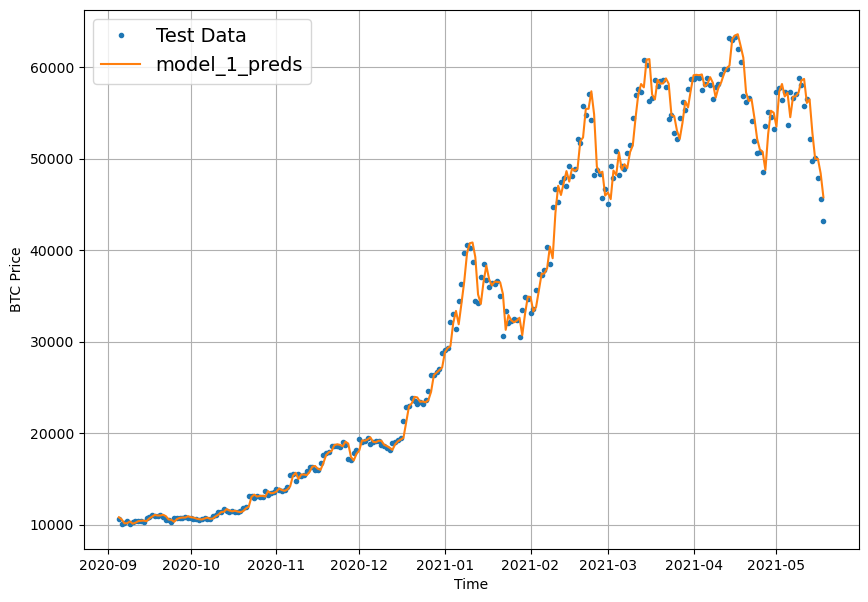

In [44]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")


## Model 2: Dense(window=30, horizon=1)

In [45]:
windows, labels = make_windows(prices, window_size=30, horizon=1)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows, labels)


In [46]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1, activation='linear')
], name="model_2_dense")

model_2.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae", "mse"])

history_model_2 = model_2.fit(train_windows,
                             train_labels,
                             validation_data=(test_windows, test_labels),
                             epochs=100,
                             batch_size=128,
                             verbose=0,
                             callbacks=[create_model_checkpoint(model_name=model_2.name)])


Epoch 1: val_loss improved from inf to 2474.93921, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 2: val_loss improved from 2474.93921 to 1976.22107, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 3: val_loss did not improve from 1976.22107

Epoch 4: val_loss improved from 1976.22107 to 1398.53674, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 5: val_loss improved from 1398.53674 to 1200.36890, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 6: val_loss did not improve from 1200.36890

Epoch 7: val_loss improved from 1200.36890 to 1098.90564, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 8: val_loss did not improve from 1098.90564

Epoch 9: val_loss improved from 1098.90564 to 1004.46875, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 10: val_loss improved from 1004.46875 to 916.61053, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 11: val_loss improved from 916.61053 to 883.06927, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 12: val_loss improved from 883.06927 to 880.59631, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 13: val_loss did not improve from 880.59631

Epoch 14: val_loss improved from 880.59631 to 851.89142, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 15: val_loss did not improve from 851.89142

Epoch 16: val_loss did not improve from 851.89142

Epoch 17: val_loss did not improve from 851.89142

Epoch 18: val_loss did not improve from 851.89142

Epoch 19: val_loss improved from 851.89142 to 771.90546, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 20: val_loss improved from 771.90546 to 766.79871, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 21: val_loss improved from 766.79871 to 753.57678, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 22: val_loss did not improve from 753.57678

Epoch 23: val_loss did not improve from 753.57678

Epoch 24: val_loss improved from 753.57678 to 736.67065, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 25: val_loss improved from 736.67065 to 735.00409, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 26: val_loss did not improve from 735.00409

Epoch 27: val_loss improved from 735.00409 to 726.36279, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 28: val_loss did not improve from 726.36279

Epoch 29: val_loss did not improve from 726.36279

Epoch 30: val_loss did not improve from 726.36279

Epoch 31: val_loss improved from 726.36279 to 719.06689, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 32: val_loss improved from 719.06689 to 714.52252, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 33: val_loss did not improve from 714.52252

Epoch 34: val_loss did not improve from 714.52252

Epoch 35: val_loss did not improve from 714.52252

Epoch 36: val_loss improved from 714.52252 to 713.19635, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 37: val_loss did not improve from 713.19635

Epoch 38: val_loss improved from 713.19635 to 706.48773, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 39: val_loss did not improve from 706.48773

Epoch 40: val_loss did not improve from 706.48773

Epoch 41: val_loss improved from 706.48773 to 682.96637, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 42: val_loss did not improve from 682.96637

Epoch 43: val_loss did not improve from 682.96637

Epoch 44: val_loss improved from 682.96637 to 669.19611, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 45: val_loss did not improve from 669.19611

Epoch 46: val_loss did not improve from 669.19611

Epoch 47: val_loss improved from 669.19611 to 665.04376, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 48: val_loss improved from 665.04376 to 662.89240, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 49: val_loss did not improve from 662.89240

Epoch 50: val_loss improved from 662.89240 to 658.50452, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 51: val_loss did not improve from 658.50452

Epoch 52: val_loss improved from 658.50452 to 654.39618, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 53: val_loss did not improve from 654.39618

Epoch 54: val_loss did not improve from 654.39618

Epoch 55: val_loss did not improve from 654.39618

Epoch 56: val_loss did not improve from 654.39618

Epoch 57: val_loss did not improve from 654.39618

Epoch 58: val_loss did not improve from 654.39618

Epoch 59: val_loss did not improve from 654.39618

Epoch 60: val_loss did not improve from 654.39618

Epoch 61: val_loss did not improve from 654.39618

Epoch 62: val_loss did not improve from 654.39618

Epoch 63: val_loss did not improve from 654.39618

Epoch 64: val_loss improved from 654.39618 to 646.61627, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 65: val_loss did not improve from 646.61627

Epoch 66: val_loss did not improve from 646.61627

Epoch 67: val_loss improved from 646.61627 to 639.65521, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 68: val_loss did not improve from 639.65521

Epoch 69: val_loss did not improve from 639.65521

Epoch 70: val_loss did not improve from 639.65521

Epoch 71: val_loss did not improve from 639.65521

Epoch 72: val_loss improved from 639.65521 to 635.85980, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 73: val_loss improved from 635.85980 to 632.89044, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 74: val_loss did not improve from 632.89044

Epoch 75: val_loss did not improve from 632.89044

Epoch 76: val_loss did not improve from 632.89044

Epoch 77: val_loss did not improve from 632.89044

Epoch 78: val_loss did not improve from 632.89044

Epoch 79: val_loss did not improve from 632.89044

Epoch 80: val_loss did not improve from 632.89044

Epoch 81: val_loss improved from 632.89044 to 631.84937, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 82: val_loss did not improve from 631.84937

Epoch 83: val_loss improved from 631.84937 to 631.72711, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 84: val_loss did not improve from 631.72711

Epoch 85: val_loss did not improve from 631.72711

Epoch 86: val_loss did not improve from 631.72711

Epoch 87: val_loss did not improve from 631.72711

Epoch 88: val_loss did not improve from 631.72711

Epoch 89: val_loss did not improve from 631.72711

Epoch 90: val_loss did not improve from 631.72711

Epoch 91: val_loss did not improve from 631.72711

Epoch 92: val_loss did not improve from 631.72711

Epoch 93: val_loss did not improve from 631.72711

Epoch 94: val_loss did not improve from 631.72711

Epoch 95: val_loss improved from 631.72711 to 623.71472, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 96: val_loss did not improve from 623.71472

Epoch 97: val_loss did not improve from 623.71472

Epoch 98: val_loss did not improve from 623.71472

Epoch 99: val_loss did not improve from 623.71472

Epoch 100: val_loss did not improve from 623.71472


In [47]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 682.8199 - mae: 682.8199 - mse: 1523755.5000


[682.8198852539062, 682.8198852539062, 1523755.5]

In [48]:
model_2 = tf.keras.models.load_model("model_experiemnts/model_2_dense/")

In [49]:
model_2_preds = make_preds(model_2, input_data=test_windows)

18/18 [==============================] - 0s 4ms/step


In [50]:
model_2_results = evaluation_preds(y_true=tf.squeeze(test_labels),
                                y_pred=model_2_preds)

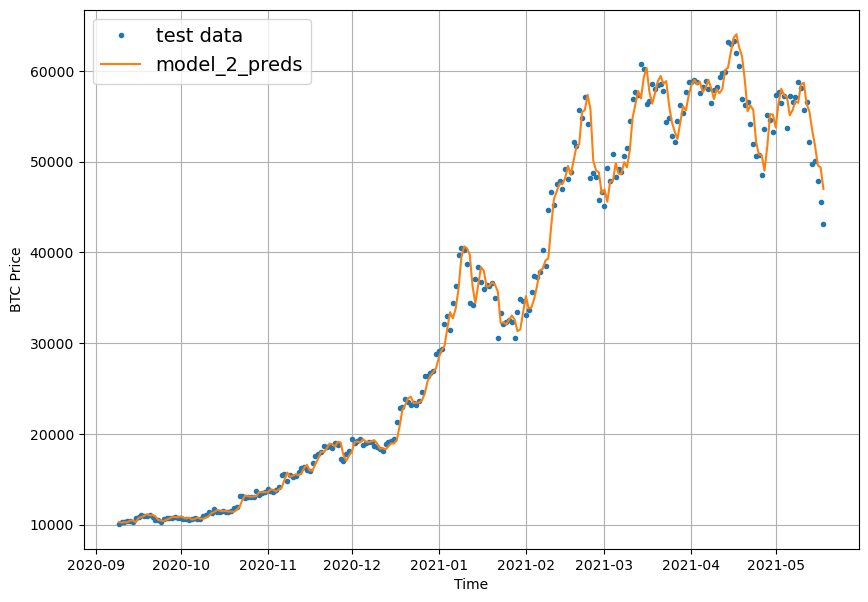

In [51]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset,format="-", label="model_2_preds")


## Model 3: Dense(window=30, horizon=7)

In [52]:
HORIZON = 7
WINDOW_SIZE = 30
windows, labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows, labels)

In [53]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae", "mse"])

history_model_3 = model_3.fit(train_windows,
                             train_labels,
                             epochs=100,
                             batch_size=128,
                              verbose=0,
                             validation_data=(test_windows, test_labels),
                             callbacks=[create_model_checkpoint(model_name=model_3.name)])


Epoch 1: val_loss improved from inf to 2799.35474, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 2: val_loss improved from 2799.35474 to 2421.67798, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 3: val_loss improved from 2421.67798 to 2176.41333, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 4: val_loss improved from 2176.41333 to 1973.49976, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 5: val_loss improved from 1973.49976 to 1940.98755, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 6: val_loss improved from 1940.98755 to 1835.60767, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 7: val_loss improved from 1835.60767 to 1603.13745, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 8: val_loss improved from 1603.13745 to 1585.46069, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 9: val_loss improved from 1585.46069 to 1560.72314, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 10: val_loss improved from 1560.72314 to 1455.23853, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 11: val_loss did not improve from 1455.23853

Epoch 12: val_loss did not improve from 1455.23853

Epoch 13: val_loss improved from 1455.23853 to 1450.46973, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 14: val_loss improved from 1450.46973 to 1442.35718, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 15: val_loss did not improve from 1442.35718

Epoch 16: val_loss improved from 1442.35718 to 1434.48022, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 17: val_loss did not improve from 1434.48022

Epoch 18: val_loss did not improve from 1434.48022

Epoch 19: val_loss did not improve from 1434.48022

Epoch 20: val_loss improved from 1434.48022 to 1385.36938, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 21: val_loss did not improve from 1385.36938

Epoch 22: val_loss did not improve from 1385.36938

Epoch 23: val_loss improved from 1385.36938 to 1336.79517, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 24: val_loss did not improve from 1336.79517

Epoch 25: val_loss did not improve from 1336.79517

Epoch 26: val_loss did not improve from 1336.79517

Epoch 27: val_loss did not improve from 1336.79517

Epoch 28: val_loss did not improve from 1336.79517

Epoch 29: val_loss did not improve from 1336.79517

Epoch 30: val_loss did not improve from 1336.79517

Epoch 31: val_loss improved from 1336.79517 to 1319.39954, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 32: val_loss improved from 1319.39954 to 1308.88562, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 33: val_loss did not improve from 1308.88562

Epoch 34: val_loss did not improve from 1308.88562

Epoch 35: val_loss did not improve from 1308.88562

Epoch 36: val_loss did not improve from 1308.88562

Epoch 37: val_loss did not improve from 1308.88562

Epoch 38: val_loss did not improve from 1308.88562

Epoch 39: val_loss did not improve from 1308.88562

Epoch 40: val_loss did not improve from 1308.88562

Epoch 41: val_loss did not improve from 1308.88562

Epoch 42: val_loss improved from 1308.88562 to 1296.81531, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 43: val_loss did not improve from 1296.81531

Epoch 44: val_loss did not improve from 1296.81531

Epoch 45: val_loss did not improve from 1296.81531

Epoch 46: val_loss did not improve from 1296.81531

Epoch 47: val_loss did not improve from 1296.81531

Epoch 48: val_loss improved from 1296.81531 to 1281.80676, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 49: val_loss did not improve from 1281.80676

Epoch 50: val_loss did not improve from 1281.80676

Epoch 51: val_loss did not improve from 1281.80676

Epoch 52: val_loss did not improve from 1281.80676

Epoch 53: val_loss improved from 1281.80676 to 1267.25134, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 54: val_loss did not improve from 1267.25134

Epoch 55: val_loss did not improve from 1267.25134

Epoch 56: val_loss did not improve from 1267.25134

Epoch 57: val_loss did not improve from 1267.25134

Epoch 58: val_loss improved from 1267.25134 to 1259.62842, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 59: val_loss did not improve from 1259.62842

Epoch 60: val_loss did not improve from 1259.62842

Epoch 61: val_loss did not improve from 1259.62842

Epoch 62: val_loss did not improve from 1259.62842

Epoch 63: val_loss did not improve from 1259.62842

Epoch 64: val_loss improved from 1259.62842 to 1256.58289, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 65: val_loss did not improve from 1256.58289

Epoch 66: val_loss did not improve from 1256.58289

Epoch 67: val_loss did not improve from 1256.58289

Epoch 68: val_loss did not improve from 1256.58289

Epoch 69: val_loss did not improve from 1256.58289

Epoch 70: val_loss improved from 1256.58289 to 1244.48169, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 71: val_loss did not improve from 1244.48169

Epoch 72: val_loss did not improve from 1244.48169

Epoch 73: val_loss did not improve from 1244.48169

Epoch 74: val_loss did not improve from 1244.48169

Epoch 75: val_loss did not improve from 1244.48169

Epoch 76: val_loss did not improve from 1244.48169

Epoch 77: val_loss did not improve from 1244.48169

Epoch 78: val_loss did not improve from 1244.48169

Epoch 79: val_loss did not improve from 1244.48169

Epoch 80: val_loss did not improve from 1244.48169

Epoch 81: val_loss did not improve from 1244.48169

Epoch 82: val_loss did not improve from 1244.48169

Epoch 83: val_loss did not improve from 1244.48169

Epoch 84: val_loss did not improve from 1244.48169

Epoch 85: val_loss did not improve from 1244.48169

Epoch 86: val_loss did not improve from 1244.48169

Epoch 87: val_loss did not improve from 1244.48169

Epoch 88: val_loss did not improve from 1244.48169

Epoch 89: val_loss did not improve from 1244.48169

Epoch 90: v

In [54]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1395.8677 - mae: 1395.8677 - mse: 6194766.5000


[1395.86767578125, 1395.86767578125, 6194766.5]

In [55]:
model_3 = tf.keras.models.load_model("model_experiemnts/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 1244.4816 - mae: 1244.4816 - mse: 5490602.0000


[1244.4815673828125, 1244.4815673828125, 5490602.0]

In [56]:
model_3_preds = make_preds(model_3, 
                          input_data=test_windows)

18/18 [==============================] - 0s 6ms/step


## Make our evaluation function work for larger horizons

In [57]:
def evaluation_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    metrics = {}
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        mase = tf.reduce_mean(mase)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)

    metrics["mae"] = mae.numpy()
    metrics["mse"] = mse.numpy()
    metrics["mase"] = mase.numpy()
    metrics["rmse"] = rmse.numpy()
    metrics["mape"] = mape.numpy()
    

    return metrics

In [58]:
# Get moddel_3 results aggregated to single values
model_3_results = evaluation_preds(y_true=tf.squeeze(test_labels),
                                  y_pred=model_3_preds)
model_3_results

{'mae': 1244.4817,
 'mse': 5490602.0,
 'mase': 2.2144854,
 'rmse': 1435.9672,
 'mape': 5.5963173}

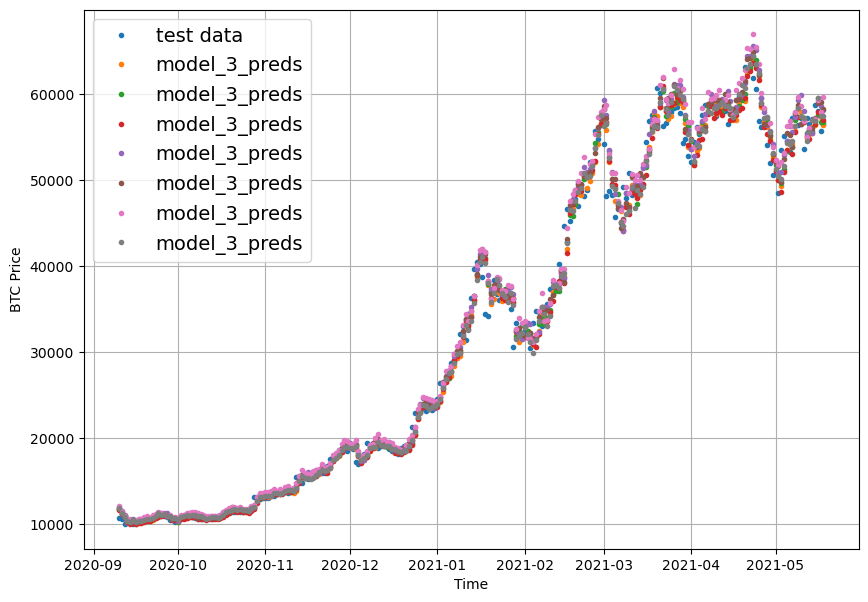

In [59]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

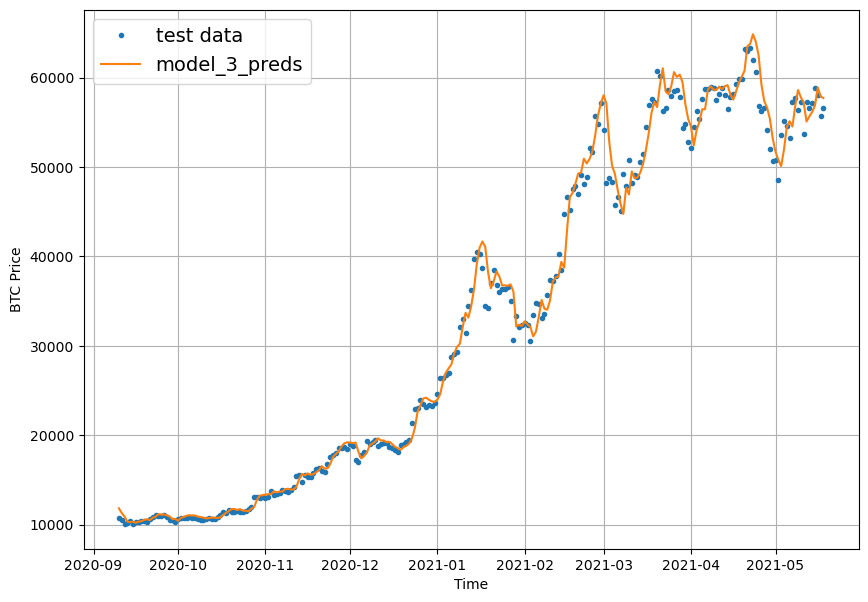

In [60]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset,  label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1),format="-", start=offset, label="model_3_preds")

## the best model so far

<Axes: >

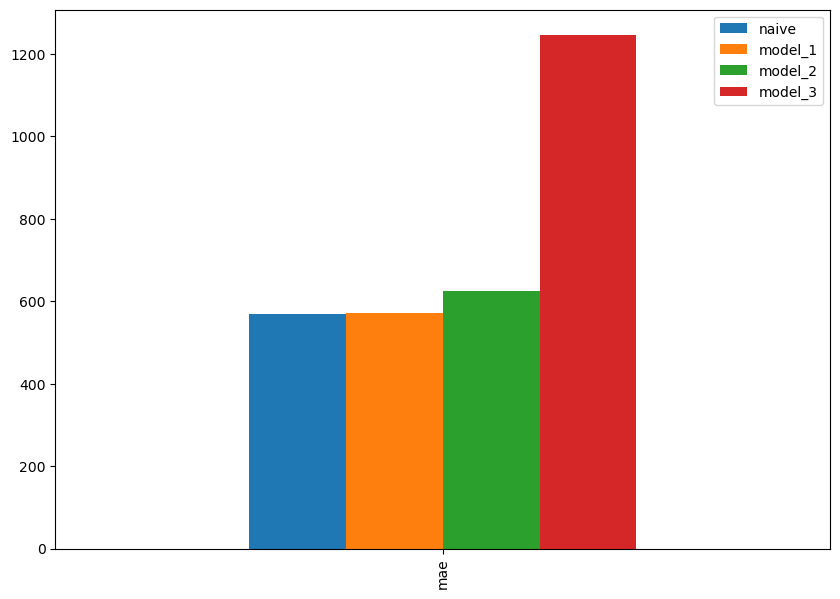

In [61]:
pd.DataFrame({"naive":naive_results["mae"],
             "model_1":model_1_results["mae"],
             "model_2":model_2_results["mae"],
             "model_3":model_3_results['mae']}, index=['mae']).plot(figsize=(10, 7), kind='bar')

## Model 4: Conv1D

In [62]:
HORIZON = 1
WINDOW_SIZE = 7


In [63]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [64]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [65]:
train_windows[0].shape

(7,)

In [66]:
# before we pass our data to the conv1d layer we have to reshape it
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [67]:
expand_dims_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [68]:
# Test out our lambda layer
print(f'original shape:{x.shape}')
print(f'expanded shape:{expand_dims_layer(x).shape}')
print(expand_dims_layer(x))

original shape:(7,)
expanded shape:(7, 1)
tf.Tensor(
[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]], shape=(7, 1), dtype=float32)


In [69]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x:tf.expand_dims(x, axis=1)),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation='relu'),
    tf.keras.layers.Dense(HORIZON)
], name="model_4")

model_4.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam())

history_model_4 = model_4.fit(train_windows, 
                             train_labels, 
                             epochs=100,
                              batch_size=128,
                              verbose=0,
                             validation_data=(test_windows, test_labels),
                             callbacks=[create_model_checkpoint(model_name=model_4.name)])


Epoch 1: val_loss improved from inf to 1083.43506, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 2: val_loss did not improve from 1083.43506

Epoch 3: val_loss improved from 1083.43506 to 1034.76404, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 4: val_loss improved from 1034.76404 to 1008.99664, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 5: val_loss improved from 1008.99664 to 1006.61603, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 6: val_loss improved from 1006.61603 to 1005.38019, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 7: val_loss improved from 1005.38019 to 966.80072, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 8: val_loss did not improve from 966.80072

Epoch 9: val_loss did not improve from 966.80072

Epoch 10: val_loss improved from 966.80072 to 927.83936, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 11: val_loss improved from 927.83936 to 911.29236, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 12: val_loss did not improve from 911.29236

Epoch 13: val_loss improved from 911.29236 to 897.65094, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 14: val_loss did not improve from 897.65094

Epoch 15: val_loss improved from 897.65094 to 895.40009, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 16: val_loss improved from 895.40009 to 857.48639, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 17: val_loss improved from 857.48639 to 839.92249, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 18: val_loss improved from 839.92249 to 823.68152, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 19: val_loss improved from 823.68152 to 798.79962, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 20: val_loss improved from 798.79962 to 789.33881, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 21: val_loss improved from 789.33881 to 759.06812, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 22: val_loss improved from 759.06812 to 748.25537, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 23: val_loss improved from 748.25537 to 746.95697, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 24: val_loss improved from 746.95697 to 733.12970, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 25: val_loss improved from 733.12970 to 713.26788, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 26: val_loss did not improve from 713.26788

Epoch 27: val_loss improved from 713.26788 to 694.44171, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 28: val_loss improved from 694.44171 to 687.42682, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 29: val_loss improved from 687.42682 to 684.10535, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 30: val_loss did not improve from 684.10535

Epoch 31: val_loss did not improve from 684.10535

Epoch 32: val_loss did not improve from 684.10535

Epoch 33: val_loss did not improve from 684.10535

Epoch 34: val_loss improved from 684.10535 to 663.21381, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 35: val_loss improved from 663.21381 to 646.63550, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 36: val_loss did not improve from 646.63550

Epoch 37: val_loss improved from 646.63550 to 632.05151, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 38: val_loss did not improve from 632.05151

Epoch 39: val_loss did not improve from 632.05151

Epoch 40: val_loss improved from 632.05151 to 631.96490, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 41: val_loss improved from 631.96490 to 626.65961, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 42: val_loss did not improve from 626.65961

Epoch 43: val_loss improved from 626.65961 to 615.84161, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 44: val_loss did not improve from 615.84161

Epoch 45: val_loss did not improve from 615.84161

Epoch 46: val_loss improved from 615.84161 to 610.18872, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 47: val_loss did not improve from 610.18872

Epoch 48: val_loss did not improve from 610.18872

Epoch 49: val_loss improved from 610.18872 to 599.47089, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 50: val_loss did not improve from 599.47089

Epoch 51: val_loss did not improve from 599.47089

Epoch 52: val_loss did not improve from 599.47089

Epoch 53: val_loss did not improve from 599.47089

Epoch 54: val_loss did not improve from 599.47089

Epoch 55: val_loss improved from 599.47089 to 591.30762, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 56: val_loss did not improve from 591.30762

Epoch 57: val_loss did not improve from 591.30762

Epoch 58: val_loss did not improve from 591.30762

Epoch 59: val_loss improved from 591.30762 to 587.10278, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 60: val_loss did not improve from 587.10278

Epoch 61: val_loss did not improve from 587.10278

Epoch 62: val_loss did not improve from 587.10278

Epoch 63: val_loss did not improve from 587.10278

Epoch 64: val_loss did not improve from 587.10278

Epoch 65: val_loss did not improve from 587.10278

Epoch 66: val_loss improved from 587.10278 to 580.60645, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 67: val_loss did not improve from 580.60645

Epoch 68: val_loss did not improve from 580.60645

Epoch 69: val_loss improved from 580.60645 to 579.49451, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 70: val_loss did not improve from 579.49451

Epoch 71: val_loss did not improve from 579.49451

Epoch 72: val_loss did not improve from 579.49451

Epoch 73: val_loss did not improve from 579.49451

Epoch 74: val_loss did not improve from 579.49451

Epoch 75: val_loss did not improve from 579.49451

Epoch 76: val_loss did not improve from 579.49451

Epoch 77: val_loss improved from 579.49451 to 575.01831, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 78: val_loss improved from 575.01831 to 574.41663, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 79: val_loss did not improve from 574.41663

Epoch 80: val_loss did not improve from 574.41663

Epoch 81: val_loss improved from 574.41663 to 572.90875, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 82: val_loss did not improve from 572.90875

Epoch 83: val_loss did not improve from 572.90875

Epoch 84: val_loss did not improve from 572.90875

Epoch 85: val_loss did not improve from 572.90875

Epoch 86: val_loss did not improve from 572.90875

Epoch 87: val_loss improved from 572.90875 to 570.33105, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 88: val_loss did not improve from 570.33105

Epoch 89: val_loss improved from 570.33105 to 570.06342, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 90: val_loss did not improve from 570.06342

Epoch 91: val_loss did not improve from 570.06342

Epoch 92: val_loss did not improve from 570.06342

Epoch 93: val_loss did not improve from 570.06342

Epoch 94: val_loss did not improve from 570.06342

Epoch 95: val_loss did not improve from 570.06342

Epoch 96: val_loss did not improve from 570.06342

Epoch 97: val_loss improved from 570.06342 to 569.92578, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 98: val_loss did not improve from 569.92578

Epoch 99: val_loss improved from 569.92578 to 567.80914, saving model to model_experiemnts\model_4
INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_4\assets



Epoch 100: val_loss did not improve from 567.80914


In [70]:
model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 657.8242


657.82421875

In [72]:
model_4 = tf.keras.models.load_model("model_experiemnts/model_4")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 567.8091


567.8091430664062

In [73]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8879.455 , 8786.268 , 9015.94  , 8770.738 , 8748.6875, 8756.8   ,
       8677.854 , 8520.512 , 8476.408 , 8520.68  ], dtype=float32)>

In [74]:
model_4_results = evaluation_preds(y_true=tf.squeeze(test_labels),
                                  y_pred=model_4_preds)
model_4_results

{'mae': 567.80914,
 'mse': 1168447.2,
 'mase': 0.9974834,
 'rmse': 1080.9474,
 'mape': 2.5314276}

In [75]:
model_1_results

{'mae': 571.14185,
 'mse': 1169292.4,
 'mase': 1.003338,
 'rmse': 1081.3383,
 'mape': 2.5642834}

## Model 5: RNN(LSTM)

In [83]:
tf.random.set_seed(42)

inputs = tf.keras.layers.Input(shape=(WINDOW_SIZE,))
x = tf.keras.layers.Lambda(lambda x:tf.expand_dims(x, axis=1))(inputs)
# x = tf.keras.layers.LSTM(128, return_sequences=True)(x)
x = tf.keras.layers.LSTM(128, activation="relu")(x)
output = tf.keras.layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs, output, name="model_5")
model_5.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam())
model_5.fit(train_windows,
           train_labels,
           epochs=100,
           verbose=1,
           batch_size=128,
           validation_data=(test_windows, test_labels),
           callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
11/18 [=================>............] - ETA: 0s - loss: 2904.4243 
Epoch 1: val_loss improved from inf to 12434.31836, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 4s 127ms/step - loss: 2669.8860 - val_loss: 12434.3184
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 1241.8464
Epoch 2: val_loss improved from 12434.31836 to 1370.34167, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 151ms/step - loss: 1241.8464 - val_loss: 1370.3417
Epoch 3/100
 9/18 [==============>...............] - ETA: 0s - loss: 243.3643
Epoch 3: val_loss improved from 1370.34167 to 1165.60315, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 154ms/step - loss: 241.4791 - val_loss: 1165.6031
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 190.1970
Epoch 4: val_loss improved from 1165.60315 to 999.31598, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 161ms/step - loss: 190.1970 - val_loss: 999.3160
Epoch 5/100
11/18 [=================>............] - ETA: 0s - loss: 183.7376
Epoch 5: val_loss improved from 999.31598 to 952.43616, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 175ms/step - loss: 174.6025 - val_loss: 952.4362
Epoch 6/100
 9/18 [==============>...............] - ETA: 0s - loss: 169.0309
Epoch 6: val_loss improved from 952.43616 to 946.60229, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 177ms/step - loss: 173.5697 - val_loss: 946.6023
Epoch 7/100
16/18 [=========================>....] - ETA: 0s - loss: 176.4549
Epoch 7: val_loss did not improve from 946.60229
18/18 [==============================] - 0s 11ms/step - loss: 171.0632 - val_loss: 949.2817
Epoch 8/100
13/18 [====================>.........] - ETA: 0s - loss: 165.4346
Epoch 8: val_loss did not improve from 946.60229
18/18 [==============================] - 0s 13ms/step - loss: 163.0465 - val_loss: 993.4830
Epoch 9/100
13/18 [====================>.........] - ETA: 0s - loss: 172.5424
Epoch 9: val_loss did not improve from 946.60229
18/18 [==============================] - 0s 14ms/step - loss: 170.8901 - val_loss: 1027.3665
Epoch 10/100
17/18 [===========================>..] - ETA: 0s - loss: 166.6988
Epoch 10: val_loss did not improve from 946.60229
18/18 [==============================] - 0s 23ms/step - loss: 167.7386 - val_loss: 982.4861
Epoch 11/100
15/18 [========

INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 151ms/step - loss: 166.4057 - val_loss: 938.9508
Epoch 12/100
 8/18 [============>.................] - ETA: 0s - loss: 165.5584
Epoch 12: val_loss improved from 938.95081 to 925.58923, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 2s 141ms/step - loss: 162.8287 - val_loss: 925.5892
Epoch 13/100
12/18 [===================>..........] - ETA: 0s - loss: 157.2955
Epoch 13: val_loss improved from 925.58923 to 914.36731, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 168ms/step - loss: 161.2084 - val_loss: 914.3673
Epoch 14/100
15/18 [========================>.....] - ETA: 0s - loss: 157.7044
Epoch 14: val_loss did not improve from 914.36731
18/18 [==============================] - 0s 12ms/step - loss: 159.6945 - val_loss: 938.5362
Epoch 15/100
14/18 [======================>.......] - ETA: 0s - loss: 159.8981
Epoch 15: val_loss improved from 914.36731 to 903.55341, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 166ms/step - loss: 159.0617 - val_loss: 903.5534
Epoch 16/100
16/18 [=========================>....] - ETA: 0s - loss: 154.8387
Epoch 16: val_loss improved from 903.55341 to 875.61633, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 198ms/step - loss: 156.7955 - val_loss: 875.6163
Epoch 17/100
14/18 [======================>.......] - ETA: 0s - loss: 153.1844
Epoch 17: val_loss did not improve from 875.61633
18/18 [==============================] - 0s 15ms/step - loss: 155.1673 - val_loss: 956.1716
Epoch 18/100
17/18 [===========================>..] - ETA: 0s - loss: 157.1994
Epoch 18: val_loss did not improve from 875.61633
18/18 [==============================] - 1s 58ms/step - loss: 155.8494 - val_loss: 912.2797
Epoch 19/100
16/18 [=========================>....] - ETA: 0s - loss: 153.2897
Epoch 19: val_loss improved from 875.61633 to 868.39868, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 200ms/step - loss: 152.3955 - val_loss: 868.3987
Epoch 20/100
11/18 [=================>............] - ETA: 0s - loss: 155.1805
Epoch 20: val_loss improved from 868.39868 to 842.64624, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 168ms/step - loss: 151.8527 - val_loss: 842.6462
Epoch 21/100
13/18 [====================>.........] - ETA: 0s - loss: 149.8941
Epoch 21: val_loss did not improve from 842.64624
18/18 [==============================] - 0s 11ms/step - loss: 150.0650 - val_loss: 849.3736
Epoch 22/100
14/18 [======================>.......] - ETA: 0s - loss: 153.5679
Epoch 22: val_loss did not improve from 842.64624
18/18 [==============================] - 0s 11ms/step - loss: 148.4426 - val_loss: 861.2698
Epoch 23/100
15/18 [========================>.....] - ETA: 0s - loss: 148.1219
Epoch 23: val_loss did not improve from 842.64624
18/18 [==============================] - 0s 11ms/step - loss: 147.7499 - val_loss: 875.8903
Epoch 24/100
13/18 [====================>.........] - ETA: 0s - loss: 143.7608
Epoch 24: val_loss improved from 842.64624 to 828.58026, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\asset

INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 176ms/step - loss: 145.8056 - val_loss: 828.5803
Epoch 25/100
15/18 [========================>.....] - ETA: 0s - loss: 149.1533
Epoch 25: val_loss improved from 828.58026 to 813.61609, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 187ms/step - loss: 143.9110 - val_loss: 813.6161
Epoch 26/100
14/18 [======================>.......] - ETA: 0s - loss: 144.6025
Epoch 26: val_loss improved from 813.61609 to 806.71271, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 171ms/step - loss: 144.0979 - val_loss: 806.7127
Epoch 27/100
18/18 [==============================] - ETA: 0s - loss: 141.8731
Epoch 27: val_loss improved from 806.71271 to 795.37671, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 170ms/step - loss: 141.8731 - val_loss: 795.3767
Epoch 28/100
15/18 [========================>.....] - ETA: 0s - loss: 138.3858
Epoch 28: val_loss improved from 795.37671 to 775.98450, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 168ms/step - loss: 140.6297 - val_loss: 775.9845
Epoch 29/100
14/18 [======================>.......] - ETA: 0s - loss: 140.5884
Epoch 29: val_loss did not improve from 775.98450
18/18 [==============================] - 0s 12ms/step - loss: 140.0444 - val_loss: 791.1055
Epoch 30/100
15/18 [========================>.....] - ETA: 0s - loss: 138.5345
Epoch 30: val_loss did not improve from 775.98450
18/18 [==============================] - 0s 11ms/step - loss: 140.0291 - val_loss: 804.6306
Epoch 31/100
14/18 [======================>.......] - ETA: 0s - loss: 137.0288
Epoch 31: val_loss improved from 775.98450 to 753.90643, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 199ms/step - loss: 136.9074 - val_loss: 753.9064
Epoch 32/100
14/18 [======================>.......] - ETA: 0s - loss: 136.6967
Epoch 32: val_loss did not improve from 753.90643
18/18 [==============================] - 0s 12ms/step - loss: 134.8233 - val_loss: 761.6572
Epoch 33/100
13/18 [====================>.........] - ETA: 0s - loss: 135.6526
Epoch 33: val_loss did not improve from 753.90643
18/18 [==============================] - 0s 12ms/step - loss: 135.1017 - val_loss: 759.8148
Epoch 34/100
17/18 [===========================>..] - ETA: 0s - loss: 134.2179
Epoch 34: val_loss improved from 753.90643 to 735.70026, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 177ms/step - loss: 134.9634 - val_loss: 735.7003
Epoch 35/100
12/18 [===================>..........] - ETA: 0s - loss: 133.2733
Epoch 35: val_loss did not improve from 735.70026
18/18 [==============================] - 0s 13ms/step - loss: 132.2855 - val_loss: 741.3313
Epoch 36/100
14/18 [======================>.......] - ETA: 0s - loss: 134.7088
Epoch 36: val_loss did not improve from 735.70026
18/18 [==============================] - 0s 16ms/step - loss: 134.5297 - val_loss: 740.2927
Epoch 37/100
13/18 [====================>.........] - ETA: 0s - loss: 132.0071
Epoch 37: val_loss improved from 735.70026 to 729.58417, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 181ms/step - loss: 130.6612 - val_loss: 729.5842
Epoch 38/100
16/18 [=========================>....] - ETA: 0s - loss: 128.8117
Epoch 38: val_loss improved from 729.58417 to 710.46411, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 149ms/step - loss: 128.4972 - val_loss: 710.4641
Epoch 39/100
15/18 [========================>.....] - ETA: 0s - loss: 131.6989
Epoch 39: val_loss did not improve from 710.46411
18/18 [==============================] - 0s 10ms/step - loss: 128.5248 - val_loss: 725.1346
Epoch 40/100
14/18 [======================>.......] - ETA: 0s - loss: 131.3611
Epoch 40: val_loss did not improve from 710.46411
18/18 [==============================] - 0s 12ms/step - loss: 129.9438 - val_loss: 725.4820
Epoch 41/100
13/18 [====================>.........] - ETA: 0s - loss: 132.4442
Epoch 41: val_loss improved from 710.46411 to 693.38391, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 167ms/step - loss: 127.0585 - val_loss: 693.3839
Epoch 42/100
17/18 [===========================>..] - ETA: 0s - loss: 126.6563
Epoch 42: val_loss improved from 693.38391 to 691.28784, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 175ms/step - loss: 125.5358 - val_loss: 691.2878
Epoch 43/100
16/18 [=========================>....] - ETA: 0s - loss: 126.6187
Epoch 43: val_loss improved from 691.28784 to 684.67029, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 204ms/step - loss: 124.7672 - val_loss: 684.6703
Epoch 44/100
17/18 [===========================>..] - ETA: 0s - loss: 127.3574
Epoch 44: val_loss improved from 684.67029 to 684.49921, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 4s 225ms/step - loss: 126.1521 - val_loss: 684.4992
Epoch 45/100
13/18 [====================>.........] - ETA: 0s - loss: 119.7541
Epoch 45: val_loss improved from 684.49921 to 674.71362, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 4s 259ms/step - loss: 122.2449 - val_loss: 674.7136
Epoch 46/100
14/18 [======================>.......] - ETA: 0s - loss: 127.3044
Epoch 46: val_loss did not improve from 674.71362
18/18 [==============================] - 0s 18ms/step - loss: 124.3156 - val_loss: 675.3350
Epoch 47/100
18/18 [==============================] - ETA: 0s - loss: 121.8752
Epoch 47: val_loss did not improve from 674.71362
18/18 [==============================] - 0s 21ms/step - loss: 121.8752 - val_loss: 682.8065
Epoch 48/100
17/18 [===========================>..] - ETA: 0s - loss: 122.3871
Epoch 48: val_loss improved from 674.71362 to 662.77509, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 4s 226ms/step - loss: 122.5170 - val_loss: 662.7751
Epoch 49/100
16/18 [=========================>....] - ETA: 0s - loss: 120.4314
Epoch 49: val_loss did not improve from 662.77509
18/18 [==============================] - 0s 16ms/step - loss: 120.7034 - val_loss: 665.0600
Epoch 50/100
17/18 [===========================>..] - ETA: 0s - loss: 123.1280
Epoch 50: val_loss did not improve from 662.77509
18/18 [==============================] - 0s 16ms/step - loss: 122.8244 - val_loss: 696.1545
Epoch 51/100
18/18 [==============================] - ETA: 0s - loss: 121.8541
Epoch 51: val_loss did not improve from 662.77509
18/18 [==============================] - 0s 27ms/step - loss: 121.8541 - val_loss: 719.0853
Epoch 52/100
17/18 [===========================>..] - ETA: 0s - loss: 120.1595
Epoch 52: val_loss improved from 662.77509 to 649.22662, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\asset

INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 4s 218ms/step - loss: 119.8498 - val_loss: 649.2266
Epoch 53/100
16/18 [=========================>....] - ETA: 0s - loss: 118.8539
Epoch 53: val_loss improved from 649.22662 to 647.38959, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 4s 237ms/step - loss: 118.6474 - val_loss: 647.3896
Epoch 54/100
12/18 [===================>..........] - ETA: 0s - loss: 116.4129
Epoch 54: val_loss did not improve from 647.38959
18/18 [==============================] - 0s 12ms/step - loss: 118.5120 - val_loss: 669.8074
Epoch 55/100
14/18 [======================>.......] - ETA: 0s - loss: 123.0711
Epoch 55: val_loss improved from 647.38959 to 637.06848, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 182ms/step - loss: 118.7271 - val_loss: 637.0685
Epoch 56/100
11/18 [=================>............] - ETA: 0s - loss: 121.2052
Epoch 56: val_loss improved from 637.06848 to 635.30511, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 177ms/step - loss: 119.9361 - val_loss: 635.3051
Epoch 57/100
14/18 [======================>.......] - ETA: 0s - loss: 126.0479
Epoch 57: val_loss did not improve from 635.30511
18/18 [==============================] - 0s 14ms/step - loss: 123.1243 - val_loss: 669.8190
Epoch 58/100
17/18 [===========================>..] - ETA: 0s - loss: 117.1731
Epoch 58: val_loss improved from 635.30511 to 629.67603, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 4s 218ms/step - loss: 117.4428 - val_loss: 629.6760
Epoch 59/100
16/18 [=========================>....] - ETA: 0s - loss: 115.5657
Epoch 59: val_loss did not improve from 629.67603
18/18 [==============================] - 0s 15ms/step - loss: 115.7486 - val_loss: 632.2171
Epoch 60/100
18/18 [==============================] - ETA: 0s - loss: 116.3128
Epoch 60: val_loss improved from 629.67603 to 626.67786, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 205ms/step - loss: 116.3128 - val_loss: 626.6779
Epoch 61/100
16/18 [=========================>....] - ETA: 0s - loss: 117.1429
Epoch 61: val_loss did not improve from 626.67786
18/18 [==============================] - 0s 15ms/step - loss: 116.0331 - val_loss: 657.7396
Epoch 62/100
18/18 [==============================] - ETA: 0s - loss: 118.0911
Epoch 62: val_loss did not improve from 626.67786
18/18 [==============================] - 0s 17ms/step - loss: 118.0911 - val_loss: 668.0613
Epoch 63/100
18/18 [==============================] - ETA: 0s - loss: 121.2460
Epoch 63: val_loss did not improve from 626.67786
18/18 [==============================] - 0s 26ms/step - loss: 121.2460 - val_loss: 627.0126
Epoch 64/100
15/18 [========================>.....] - ETA: 0s - loss: 115.6908
Epoch 64: val_loss did not improve from 626.67786
18/18 [==============================] - 0s 25ms/step - loss: 114.8132 - val_loss: 631.5229
Epoch 65/100
17/18 [===

INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 170ms/step - loss: 115.3400 - val_loss: 615.0894
Epoch 66/100
17/18 [===========================>..] - ETA: 0s - loss: 114.4949
Epoch 66: val_loss did not improve from 615.08942
18/18 [==============================] - 0s 16ms/step - loss: 114.0970 - val_loss: 628.7460
Epoch 67/100
17/18 [===========================>..] - ETA: 0s - loss: 114.4961
Epoch 67: val_loss improved from 615.08942 to 612.15057, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 204ms/step - loss: 115.7560 - val_loss: 612.1506
Epoch 68/100
12/18 [===================>..........] - ETA: 0s - loss: 115.5630
Epoch 68: val_loss did not improve from 612.15057
18/18 [==============================] - 0s 11ms/step - loss: 116.2037 - val_loss: 615.4583
Epoch 69/100
12/18 [===================>..........] - ETA: 0s - loss: 118.9802
Epoch 69: val_loss did not improve from 612.15057
18/18 [==============================] - 0s 12ms/step - loss: 117.3370 - val_loss: 615.9680
Epoch 70/100
12/18 [===================>..........] - ETA: 0s - loss: 114.3837
Epoch 70: val_loss did not improve from 612.15057
18/18 [==============================] - 0s 12ms/step - loss: 116.5123 - val_loss: 625.5399
Epoch 71/100
18/18 [==============================] - ETA: 0s - loss: 113.7310
Epoch 71: val_loss did not improve from 612.15057
18/18 [==============================] - 0s 14ms/step - loss: 113.7310 - val_loss: 626.4203
Epoch 72/100
17/18 [===

INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 159ms/step - loss: 114.2686 - val_loss: 611.4869
Epoch 77/100
18/18 [==============================] - ETA: 0s - loss: 115.6426
Epoch 77: val_loss did not improve from 611.48694
18/18 [==============================] - 0s 14ms/step - loss: 115.6426 - val_loss: 669.2870
Epoch 78/100
17/18 [===========================>..] - ETA: 0s - loss: 116.9929
Epoch 78: val_loss did not improve from 611.48694
18/18 [==============================] - 0s 14ms/step - loss: 115.9787 - val_loss: 626.0133
Epoch 79/100
17/18 [===========================>..] - ETA: 0s - loss: 113.0421
Epoch 79: val_loss improved from 611.48694 to 597.98199, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 198ms/step - loss: 112.6517 - val_loss: 597.9820
Epoch 80/100
15/18 [========================>.....] - ETA: 0s - loss: 115.2170
Epoch 80: val_loss did not improve from 597.98199
18/18 [==============================] - 0s 16ms/step - loss: 111.8147 - val_loss: 620.2606
Epoch 81/100
15/18 [========================>.....] - ETA: 0s - loss: 113.7288
Epoch 81: val_loss did not improve from 597.98199
18/18 [==============================] - 0s 16ms/step - loss: 112.6753 - val_loss: 636.7250
Epoch 82/100
17/18 [===========================>..] - ETA: 0s - loss: 113.9623
Epoch 82: val_loss did not improve from 597.98199
18/18 [==============================] - 0s 27ms/step - loss: 115.0791 - val_loss: 601.8591
Epoch 83/100
15/18 [========================>.....] - ETA: 0s - loss: 111.6938
Epoch 83: val_loss did not improve from 597.98199
18/18 [==============================] - 0s 20ms/step - loss: 111.7025 - val_loss: 636.3344
Epoch 84/100
16/18 [===

INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 155ms/step - loss: 113.1052 - val_loss: 597.9260
Epoch 85/100
17/18 [===========================>..] - ETA: 0s - loss: 110.1326
Epoch 85: val_loss did not improve from 597.92603
18/18 [==============================] - 0s 14ms/step - loss: 111.4403 - val_loss: 622.6713
Epoch 86/100
14/18 [======================>.......] - ETA: 0s - loss: 107.4642
Epoch 86: val_loss did not improve from 597.92603
18/18 [==============================] - 0s 11ms/step - loss: 113.5554 - val_loss: 614.4019
Epoch 87/100
17/18 [===========================>..] - ETA: 0s - loss: 113.5436
Epoch 87: val_loss improved from 597.92603 to 590.78363, saving model to model_experiemnts\model_5
INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 4s 242ms/step - loss: 113.0680 - val_loss: 590.7836
Epoch 88/100
16/18 [=========================>....] - ETA: 0s - loss: 113.0069
Epoch 88: val_loss did not improve from 590.78363
18/18 [==============================] - 0s 12ms/step - loss: 111.1181 - val_loss: 593.7264
Epoch 89/100
16/18 [=========================>....] - ETA: 0s - loss: 106.9103
Epoch 89: val_loss did not improve from 590.78363
18/18 [==============================] - 0s 11ms/step - loss: 111.5851 - val_loss: 617.9590
Epoch 90/100
17/18 [===========================>..] - ETA: 0s - loss: 113.8486
Epoch 90: val_loss did not improve from 590.78363
18/18 [==============================] - 0s 11ms/step - loss: 113.9257 - val_loss: 676.1319
Epoch 91/100
16/18 [=========================>....] - ETA: 0s - loss: 113.7176
Epoch 91: val_loss did not improve from 590.78363
18/18 [==============================] - 0s 11ms/step - loss: 114.6772 - val_loss: 602.1052
Epoch 92/100
15/18 [===

INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 4s 207ms/step - loss: 111.7268 - val_loss: 589.1862
Epoch 93/100
18/18 [==============================] - ETA: 0s - loss: 111.6606
Epoch 93: val_loss did not improve from 589.18622
18/18 [==============================] - 0s 14ms/step - loss: 111.6606 - val_loss: 615.8894
Epoch 94/100
16/18 [=========================>....] - ETA: 0s - loss: 112.8051
Epoch 94: val_loss did not improve from 589.18622
18/18 [==============================] - 0s 16ms/step - loss: 111.3224 - val_loss: 601.6353
Epoch 95/100
12/18 [===================>..........] - ETA: 0s - loss: 107.7820
Epoch 95: val_loss did not improve from 589.18622
18/18 [==============================] - 0s 14ms/step - loss: 110.4323 - val_loss: 590.9519
Epoch 96/100
15/18 [========================>.....] - ETA: 0s - loss: 108.0898
Epoch 96: val_loss did not improve from 589.18622
18/18 [==============================] - 0s 19ms/step - loss: 111.4288 - val_loss: 592.7986
Epoch 97/100
15/18 [===

INFO:tensorflow:Assets written to: model_experiemnts\model_5\assets


18/18 [==============================] - 3s 195ms/step - loss: 109.8537 - val_loss: 583.8666
Epoch 100/100
16/18 [=========================>....] - ETA: 0s - loss: 115.0647
Epoch 100: val_loss did not improve from 583.86664
18/18 [==============================] - 0s 15ms/step - loss: 111.9777 - val_loss: 584.1460


In [84]:
model_5 = tf.keras.models.load_model("model_experiemnts/model_5")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 583.8666


583.8666381835938

In [85]:
model_5_preds = make_preds(model_5, test_windows)
model_5_results = evaluation_preds(y_true=tf.squeeze(test_labels),
                                  y_pred=model_5_preds)
model_5_results

18/18 [==============================] - 0s 3ms/step


{'mae': 583.8666,
 'mse': 1234538.2,
 'mase': 1.0256919,
 'rmse': 1111.0978,
 'mape': 2.626362}

## Make a multivariate time series dataset

bitcoin halving events

In [86]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [87]:
# Add bitcoin halving to our dataset
block_reward_1 = 50 # 3 January 2009
block_reward_2 = 25 # 8 november 2012
block_reward_3 = 12.5 # 9 july 2016
block_reward_4 = 6.25 # 18 may 2020

# block rewarddd dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [91]:
block_reward_2_days = (block_reward_3_datetime-bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime-bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [93]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,None
2013-10-02,125.45500,None
2013-10-03,108.58483,None
2013-10-04,118.67466,None
2013-10-05,121.33866,None


In [97]:
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<Axes: xlabel='Date'>

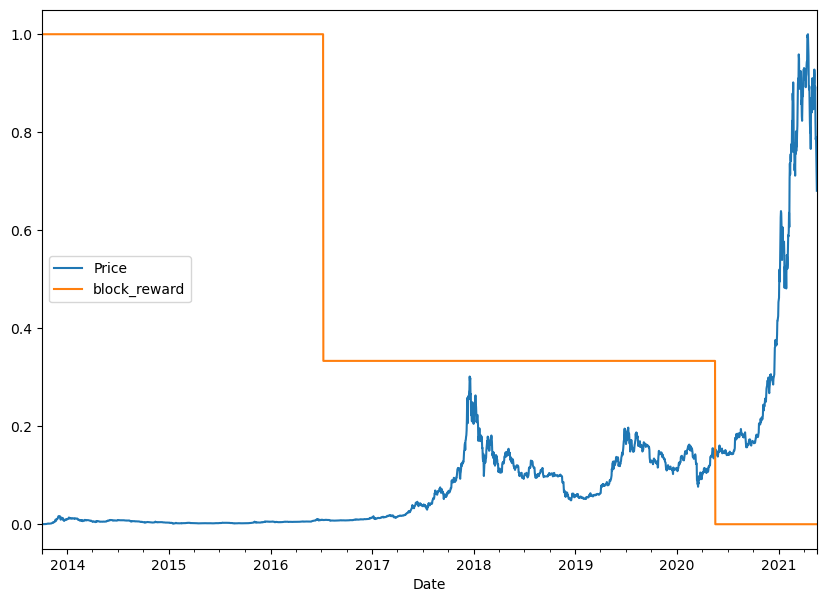

In [102]:
#plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                    columns=bitcoin_prices_block.columns,
                                    index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7))

## Making a windowed dataset with pandas

In [105]:
HORIZON = 1
WINDOW_SIZE = 7
bitcoin_prices_windowed = bitcoin_prices_block.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_windowed[f'Price+{i+1}'] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
    
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [108]:
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head(5)

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [110]:
y.head(5)

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [111]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [112]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON)
], name="model_6")

model_6.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam())

model_6.fit(X_train,
           y_train,
           epochs=100,
           batch_size=128,
           validation_data=(X_test, y_test),
           verbose=1,
           callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 9s - loss: 2650.6426
Epoch 1: val_loss improved from inf to 2862.67578, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 44ms/step - loss: 986.8510 - val_loss: 2862.6758
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 442.4463
Epoch 2: val_loss improved from 2862.67578 to 1305.26575, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 32ms/step - loss: 316.2873 - val_loss: 1305.2657
Epoch 3/100
16/18 [=========================>....] - ETA: 0s - loss: 249.6879
Epoch 3: val_loss improved from 1305.26575 to 1295.85742, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 53ms/step - loss: 245.6490 - val_loss: 1295.8574
Epoch 4/100
13/18 [====================>.........] - ETA: 0s - loss: 235.9796
Epoch 4: val_loss improved from 1295.85742 to 1224.75977, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 34ms/step - loss: 226.1626 - val_loss: 1224.7598
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 222.9247
Epoch 5: val_loss improved from 1224.75977 to 1195.84009, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 35ms/step - loss: 217.7098 - val_loss: 1195.8401
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 167.9807
Epoch 6: val_loss improved from 1195.84009 to 1160.11890, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 42ms/step - loss: 211.4958 - val_loss: 1160.1189
Epoch 7/100
15/18 [========================>.....] - ETA: 0s - loss: 209.8603
Epoch 7: val_loss improved from 1160.11890 to 1149.55774, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 65ms/step - loss: 203.5087 - val_loss: 1149.5577
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 194.3791
Epoch 8: val_loss improved from 1149.55774 to 1077.54602, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 48ms/step - loss: 194.3791 - val_loss: 1077.5460
Epoch 9/100
10/18 [===============>..............] - ETA: 0s - loss: 185.6342
Epoch 9: val_loss improved from 1077.54602 to 1043.89526, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 2s 95ms/step - loss: 188.7131 - val_loss: 1043.8953
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 201.5167
Epoch 10: val_loss improved from 1043.89526 to 995.35828, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 40ms/step - loss: 182.0198 - val_loss: 995.3583
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 196.5221
Epoch 11: val_loss improved from 995.35828 to 974.43481, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 61ms/step - loss: 173.1752 - val_loss: 974.4348
Epoch 12/100
16/18 [=========================>....] - ETA: 0s - loss: 166.7444
Epoch 12: val_loss improved from 974.43481 to 968.27179, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 2s 98ms/step - loss: 166.1211 - val_loss: 968.2718
Epoch 13/100
18/18 [==============================] - ETA: 0s - loss: 163.3030
Epoch 13: val_loss did not improve from 968.27179
18/18 [==============================] - 0s 6ms/step - loss: 163.3030 - val_loss: 1012.5508
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 180.2008
Epoch 14: val_loss improved from 968.27179 to 908.01678, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 31ms/step - loss: 157.7660 - val_loss: 908.0168
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 154.2884
Epoch 15: val_loss improved from 908.01678 to 847.69458, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 33ms/step - loss: 151.4934 - val_loss: 847.6946
Epoch 16/100
13/18 [====================>.........] - ETA: 0s - loss: 146.9129
Epoch 16: val_loss improved from 847.69458 to 814.29626, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 56ms/step - loss: 144.0825 - val_loss: 814.2963
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 135.1737
Epoch 17: val_loss did not improve from 814.29626
18/18 [==============================] - 0s 5ms/step - loss: 140.5099 - val_loss: 865.0824
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 155.7259
Epoch 18: val_loss did not improve from 814.29626
18/18 [==============================] - 0s 6ms/step - loss: 143.2944 - val_loss: 896.2577
Epoch 19/100
17/18 [===========================>..] - ETA: 0s - loss: 135.8039
Epoch 19: val_loss improved from 814.29626 to 794.88464, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 71ms/step - loss: 134.8962 - val_loss: 794.8846
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 144.8190
Epoch 20: val_loss improved from 794.88464 to 736.57184, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 40ms/step - loss: 132.0603 - val_loss: 736.5718
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 183.0372
Epoch 21: val_loss improved from 736.57184 to 705.61444, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 67ms/step - loss: 135.0647 - val_loss: 705.6144
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 182.7446
Epoch 22: val_loss did not improve from 705.61444
18/18 [==============================] - 0s 6ms/step - loss: 127.5206 - val_loss: 738.5872
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 134.5319
Epoch 23: val_loss did not improve from 705.61444
18/18 [==============================] - 0s 6ms/step - loss: 131.1908 - val_loss: 735.9344
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 143.3819
Epoch 24: val_loss improved from 705.61444 to 664.41840, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 35ms/step - loss: 127.9540 - val_loss: 664.4184
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 129.5229
Epoch 25: val_loss improved from 664.41840 to 653.70593, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 3s 162ms/step - loss: 124.4301 - val_loss: 653.7059
Epoch 26/100
10/18 [===============>..............] - ETA: 0s - loss: 125.5104
Epoch 26: val_loss improved from 653.70593 to 644.11584, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 65ms/step - loss: 121.6188 - val_loss: 644.1158
Epoch 27/100
17/18 [===========================>..] - ETA: 0s - loss: 120.9647
Epoch 27: val_loss did not improve from 644.11584
18/18 [==============================] - 0s 14ms/step - loss: 121.2472 - val_loss: 651.0752
Epoch 28/100
14/18 [======================>.......] - ETA: 0s - loss: 116.3126
Epoch 28: val_loss improved from 644.11584 to 631.20355, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 68ms/step - loss: 119.3881 - val_loss: 631.2036
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 116.1298
Epoch 29: val_loss did not improve from 631.20355
18/18 [==============================] - 0s 6ms/step - loss: 117.3701 - val_loss: 646.2032
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 131.6643
Epoch 30: val_loss improved from 631.20355 to 621.34058, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 78ms/step - loss: 125.1128 - val_loss: 621.3406
Epoch 31/100
18/18 [==============================] - ETA: 0s - loss: 115.9387
Epoch 31: val_loss did not improve from 621.34058
18/18 [==============================] - 0s 7ms/step - loss: 115.9387 - val_loss: 630.1799
Epoch 32/100
16/18 [=========================>....] - ETA: 0s - loss: 114.7603
Epoch 32: val_loss improved from 621.34058 to 612.85791, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 48ms/step - loss: 116.1803 - val_loss: 612.8579
Epoch 33/100
16/18 [=========================>....] - ETA: 0s - loss: 118.9064
Epoch 33: val_loss did not improve from 612.85791
18/18 [==============================] - 0s 7ms/step - loss: 117.0099 - val_loss: 643.6086
Epoch 34/100
12/18 [===================>..........] - ETA: 0s - loss: 119.2892
Epoch 34: val_loss did not improve from 612.85791
18/18 [==============================] - 0s 9ms/step - loss: 115.2985 - val_loss: 652.2056
Epoch 35/100
12/18 [===================>..........] - ETA: 0s - loss: 117.3644
Epoch 35: val_loss improved from 612.85791 to 603.00372, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 77ms/step - loss: 114.5129 - val_loss: 603.0037
Epoch 36/100
12/18 [===================>..........] - ETA: 0s - loss: 114.5771
Epoch 36: val_loss did not improve from 603.00372
18/18 [==============================] - 0s 11ms/step - loss: 117.8201 - val_loss: 625.4599
Epoch 37/100
17/18 [===========================>..] - ETA: 0s - loss: 117.6703
Epoch 37: val_loss improved from 603.00372 to 602.99268, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 85ms/step - loss: 118.4047 - val_loss: 602.9927
Epoch 38/100
16/18 [=========================>....] - ETA: 0s - loss: 117.7942
Epoch 38: val_loss did not improve from 602.99268
18/18 [==============================] - 0s 7ms/step - loss: 117.1472 - val_loss: 633.9148
Epoch 39/100
17/18 [===========================>..] - ETA: 0s - loss: 115.7877
Epoch 39: val_loss improved from 602.99268 to 596.13757, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 56ms/step - loss: 116.1323 - val_loss: 596.1376
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 106.3500
Epoch 40: val_loss did not improve from 596.13757
18/18 [==============================] - 0s 6ms/step - loss: 112.0050 - val_loss: 614.9672
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 106.4087
Epoch 41: val_loss did not improve from 596.13757
18/18 [==============================] - 0s 8ms/step - loss: 111.6470 - val_loss: 606.9882
Epoch 42/100
 8/18 [============>.................] - ETA: 0s - loss: 112.5138
Epoch 42: val_loss did not improve from 596.13757
18/18 [==============================] - 0s 21ms/step - loss: 116.3864 - val_loss: 626.8329
Epoch 43/100
13/18 [====================>.........] - ETA: 0s - loss: 114.1159
Epoch 43: val_loss did not improve from 596.13757
18/18 [==============================] - 0s 14ms/step - loss: 119.3018 - val_loss: 647.9788
Epoch 44/100
13/18 [======

INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 49ms/step - loss: 111.9666 - val_loss: 592.9588
Epoch 48/100
 1/18 [>.............................] - ETA: 0s - loss: 95.8353
Epoch 48: val_loss did not improve from 592.95880
18/18 [==============================] - 0s 6ms/step - loss: 111.7346 - val_loss: 665.0504
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 177.4557
Epoch 49: val_loss improved from 592.95880 to 579.41113, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 41ms/step - loss: 116.6115 - val_loss: 579.4111
Epoch 50/100
 1/18 [>.............................] - ETA: 0s - loss: 130.3689
Epoch 50: val_loss did not improve from 579.41113
18/18 [==============================] - 0s 4ms/step - loss: 112.6343 - val_loss: 675.4816
Epoch 51/100
 1/18 [>.............................] - ETA: 0s - loss: 101.2948
Epoch 51: val_loss did not improve from 579.41113
18/18 [==============================] - 0s 5ms/step - loss: 113.9125 - val_loss: 635.1894
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 121.7078
Epoch 52: val_loss did not improve from 579.41113
18/18 [==============================] - 0s 5ms/step - loss: 114.4805 - val_loss: 584.8528
Epoch 53/100
 1/18 [>.............................] - ETA: 0s - loss: 63.0993
Epoch 53: val_loss did not improve from 579.41113
18/18 [==============================] - 0s 5ms/step - loss: 112.8364 - val_loss: 634.7490
Epoch 54/100
 1/18 [>........

INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 41ms/step - loss: 114.1701 - val_loss: 574.3870
Epoch 55/100
17/18 [===========================>..] - ETA: 0s - loss: 117.9975
Epoch 55: val_loss did not improve from 574.38702
18/18 [==============================] - 0s 7ms/step - loss: 116.7038 - val_loss: 580.1623
Epoch 56/100
18/18 [==============================] - ETA: 0s - loss: 111.6948
Epoch 56: val_loss did not improve from 574.38702
18/18 [==============================] - 0s 6ms/step - loss: 111.6948 - val_loss: 785.3568
Epoch 57/100
18/18 [==============================] - ETA: 0s - loss: 128.0571
Epoch 57: val_loss did not improve from 574.38702
18/18 [==============================] - 0s 6ms/step - loss: 128.0571 - val_loss: 689.8613
Epoch 58/100
 1/18 [>.............................] - ETA: 0s - loss: 95.3700
Epoch 58: val_loss did not improve from 574.38702
18/18 [==============================] - 0s 5ms/step - loss: 115.0650 - val_loss: 613.1764
Epoch 59/100
18/18 [=========

INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 2s 97ms/step - loss: 108.8876 - val_loss: 571.1310
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 75.0109
Epoch 62: val_loss did not improve from 571.13104
18/18 [==============================] - 0s 5ms/step - loss: 106.9675 - val_loss: 589.2999
Epoch 63/100
 1/18 [>.............................] - ETA: 0s - loss: 94.9240
Epoch 63: val_loss improved from 571.13104 to 571.08759, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 41ms/step - loss: 109.4187 - val_loss: 571.0876
Epoch 64/100
 1/18 [>.............................] - ETA: 0s - loss: 90.0874
Epoch 64: val_loss did not improve from 571.08759
18/18 [==============================] - 0s 5ms/step - loss: 107.2682 - val_loss: 597.3741
Epoch 65/100
14/18 [======================>.......] - ETA: 0s - loss: 109.2882
Epoch 65: val_loss did not improve from 571.08759
18/18 [==============================] - 0s 7ms/step - loss: 109.2493 - val_loss: 574.7746
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 114.2382
Epoch 66: val_loss did not improve from 571.08759
18/18 [==============================] - 0s 6ms/step - loss: 107.2373 - val_loss: 572.4369
Epoch 67/100
16/18 [=========================>....] - ETA: 0s - loss: 104.4109
Epoch 67: val_loss did not improve from 571.08759
18/18 [==============================] - 0s 8ms/step - loss: 107.0819 - val_loss: 681.4600
Epoch 68/100
13/18 [=========

INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 70ms/step - loss: 107.4830 - val_loss: 567.9518
Epoch 69/100
 1/18 [>.............................] - ETA: 0s - loss: 92.3538
Epoch 69: val_loss did not improve from 567.95184
18/18 [==============================] - 0s 5ms/step - loss: 107.2777 - val_loss: 628.9182
Epoch 70/100
 1/18 [>.............................] - ETA: 0s - loss: 110.7663
Epoch 70: val_loss did not improve from 567.95184
18/18 [==============================] - 0s 6ms/step - loss: 117.6094 - val_loss: 575.8235
Epoch 71/100
 1/18 [>.............................] - ETA: 0s - loss: 85.3649
Epoch 71: val_loss did not improve from 567.95184
18/18 [==============================] - 0s 5ms/step - loss: 107.8196 - val_loss: 568.0236
Epoch 72/100
 1/18 [>.............................] - ETA: 0s - loss: 95.4623
Epoch 72: val_loss did not improve from 567.95184
18/18 [==============================] - 0s 6ms/step - loss: 111.0099 - val_loss: 571.1296
Epoch 73/100
 1/18 [>..........

INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 62ms/step - loss: 107.3283 - val_loss: 566.8408
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 187.8657
Epoch 82: val_loss did not improve from 566.84082
18/18 [==============================] - 0s 6ms/step - loss: 119.3712 - val_loss: 579.3954
Epoch 83/100
 1/18 [>.............................] - ETA: 0s - loss: 109.5853
Epoch 83: val_loss did not improve from 566.84082
18/18 [==============================] - 0s 5ms/step - loss: 112.6011 - val_loss: 724.3829
Epoch 84/100
 1/18 [>.............................] - ETA: 0s - loss: 128.9642
Epoch 84: val_loss did not improve from 566.84082
18/18 [==============================] - 0s 5ms/step - loss: 114.6684 - val_loss: 572.1256
Epoch 85/100
 1/18 [>.............................] - ETA: 0s - loss: 78.9655
Epoch 85: val_loss improved from 566.84082 to 566.78162, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 35ms/step - loss: 106.6663 - val_loss: 566.7816
Epoch 86/100
16/18 [=========================>....] - ETA: 0s - loss: 105.2373
Epoch 86: val_loss did not improve from 566.78162
18/18 [==============================] - 0s 7ms/step - loss: 106.4644 - val_loss: 575.0998
Epoch 87/100
 1/18 [>.............................] - ETA: 0s - loss: 124.1298
Epoch 87: val_loss did not improve from 566.78162
18/18 [==============================] - 0s 6ms/step - loss: 105.3967 - val_loss: 585.5935
Epoch 88/100
 1/18 [>.............................] - ETA: 0s - loss: 129.4756
Epoch 88: val_loss did not improve from 566.78162
18/18 [==============================] - 0s 7ms/step - loss: 106.8088 - val_loss: 596.2190
Epoch 89/100
11/18 [=================>............] - ETA: 0s - loss: 98.1497 
Epoch 89: val_loss did not improve from 566.78162
18/18 [==============================] - 0s 15ms/step - loss: 106.1309 - val_loss: 568.3032
Epoch 90/100
12/18 [=======

INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 38ms/step - loss: 108.4147 - val_loss: 564.2861
Epoch 92/100
 1/18 [>.............................] - ETA: 0s - loss: 81.8760
Epoch 92: val_loss did not improve from 564.28607
18/18 [==============================] - 0s 4ms/step - loss: 110.8675 - val_loss: 639.5012
Epoch 93/100
 1/18 [>.............................] - ETA: 0s - loss: 114.8979
Epoch 93: val_loss did not improve from 564.28607
18/18 [==============================] - 0s 5ms/step - loss: 122.9850 - val_loss: 656.6616
Epoch 94/100
 1/18 [>.............................] - ETA: 0s - loss: 147.6246
Epoch 94: val_loss did not improve from 564.28607
18/18 [==============================] - 0s 5ms/step - loss: 109.6455 - val_loss: 567.8412
Epoch 95/100
 1/18 [>.............................] - ETA: 0s - loss: 131.3102
Epoch 95: val_loss improved from 564.28607 to 564.24426, saving model to model_experiemnts\model_6
INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_6\assets


18/18 [==============================] - 1s 35ms/step - loss: 105.8323 - val_loss: 564.2443
Epoch 96/100
 1/18 [>.............................] - ETA: 0s - loss: 106.8627
Epoch 96: val_loss did not improve from 564.24426
18/18 [==============================] - 0s 4ms/step - loss: 107.2159 - val_loss: 591.3625
Epoch 97/100
 1/18 [>.............................] - ETA: 0s - loss: 100.2403
Epoch 97: val_loss did not improve from 564.24426
18/18 [==============================] - 0s 5ms/step - loss: 105.9191 - val_loss: 567.3606
Epoch 98/100
 1/18 [>.............................] - ETA: 0s - loss: 114.0344
Epoch 98: val_loss did not improve from 564.24426
18/18 [==============================] - 0s 5ms/step - loss: 105.4298 - val_loss: 575.6169
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 144.9021
Epoch 99: val_loss did not improve from 564.24426
18/18 [==============================] - 0s 4ms/step - loss: 106.7865 - val_loss: 571.3720
Epoch 100/100
 1/18 [>......

In [114]:
model_6 = tf.keras.models.load_model("model_experiemnts/model_6")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 564.2442


564.2442016601562

In [115]:
model_6_preds = make_preds(model_6, X_test)
model_6_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8813.01 , 8748.536, 9005.322, 8727.923, 8721.374], dtype=float32)>

In [118]:
model_6_results = evaluation_preds(y_true=tf.squeeze(y_test),
                                  y_pred=model_6_preds)
model_6_results

{'mae': 564.24426,
 'mse': 1149923.9,
 'mase': 0.9912209,
 'rmse': 1072.3451,
 'mape': 2.531125}

In [121]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'mase': 0.99957,
 'rmse': 1071.2362,
 'mape': 2.5165248}